<a href="https://colab.research.google.com/github/henrypoon1216/henry-s-project/blob/data-science/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("/content/Datasetv2.csv")
data["Public Housing"].value_counts()

Public Housing
False    158122
True       1554
Name: count, dtype: int64

In [3]:
data

Unnamed: 0       date  \
0                0   9/3/2023   
1                1   9/3/2023   
2                2   8/3/2023   
3                3   8/3/2023   
4                4   8/3/2023   
...            ...        ...   
159671      174331  11/6/2021   
159672      174332  11/6/2021   
159673      174333  11/6/2021   
159674      174334  11/6/2021   
159675      174335  11/6/2021   

                                                  address     price changes  \
0           The Long Beach, Tower 7, Middle Floor, Flat D     33000      --   
1           One Kai Tak, II, Tower 3, Upper Floor, Flat H     15800      --   
2                 Sky Tower, Block 1, Lower Floor, Flat B     18800      --   
3             Hampton Place, Tower 2, Upper Floor, Flat F     17000      --   
4                           Skypark, Upper Floor, Flat A5     18000      --   
...                                                   ...       ...     ...   
159671              Heng Fa Chuen, Block 29, 13/F, Flat 7  11670000      --   
159672  Taikoo Shing, Kao Shan Terrace, (T-07) Tien Sh...  10750000    150%   
159673  Harbour Heights, Block 2 (Sung Fung Court), 21...  11830000    426%   
159674  Taikoo Shing, Sing Fai Terrace, (T-48) Hoi Sin...  12300000      --   
159675  Taikoo Shing, Kam Din Terrace, (T-23) Hsia Kun...  12850000    213%   

       saleable_area(ft^2)  unit_rate                       district Tower  \
0                      816         40  Kowloon Kowloon City District     7   
1                      375         42  Kowloon Kowloon City District     3   
2                      520         36  Kowloon Kowloon City District   NaN   
3                      429         40  Kowloon Kowloon City District     2   
4                      407         44  Kowloon Kowloon City District   NaN   
...                    ...        ...                            ...   ...   
159671                 643      18146      HKIsIand Eastern District   NaN   
159672                 536      20056      HKIsIand Eastern District   NaN   
159673                 620      19081      HKIsIand Eastern District   NaN   
159674                 580      21207      HKIsIand Eastern District   NaN   
159675                 580      22155      HKIsIand Eastern District   NaN   

       Flat Phase Block  Rental  Public Housing  floor  
0         D   NaN   NaN    True           False   13.0  
1         H   NaN   NaN    True           False   22.0  
2         B   NaN     1    True           False    7.0  
3         F   NaN   NaN    True           False   22.0  
4         A   NaN   NaN    True           False   22.0  
...     ...   ...   ...     ...             ...    ...  
159671    7   NaN    29   False           False   13.0  
159672    G   NaN   NaN   False           False   24.0  
159673    D   NaN     2   False           False   21.0  
159674    G   NaN   NaN   False           False   16.0  
159675    B   NaN   NaN   False           False   27.0  

[159676 rows x 15 columns]

In [10]:
data["floor"].isna().sum()

0

# 1. Introduction
The Housing Problem has always been an issue in Hong Kong. People blame the demand for being much higher than the supply, leading to a high rise in Housing Prices. However, after the pandemic, the housing market cooled down due to falling demand.

This dataset has contained the transaction and rental price of private housing from 2020 to 2023. We will analyse the relationship between each characteristics to the price by linear regression and model the price by time series.





# 2. Data Manipulation
It is found that there are only 1554 public housing transaction record in the dataset. Since the characteristics of public and private housing is much different, we will just pay attention on the private Housing.

On the other hand, the value in the price column could be rental price or transfer ptice. It is quite dangerous to put them together for analysis. Hence, we will consider them separately.

In [ ]:
rent = data.loc[(data.Rental == True) & (data["Public Housing"] == False)]
sell = data.loc[(data.Rental == False) & (data["Public Housing"] == False)]

# 3. Data Analysis
https://public.tableau.com/app/profile/chun.hei.poon/viz/HongKOngHousingPriceAnalysis/DistributionofUnitRateineachDistrict#4

Data visualization has been produced on Tableau Public and is accessible from the above link.
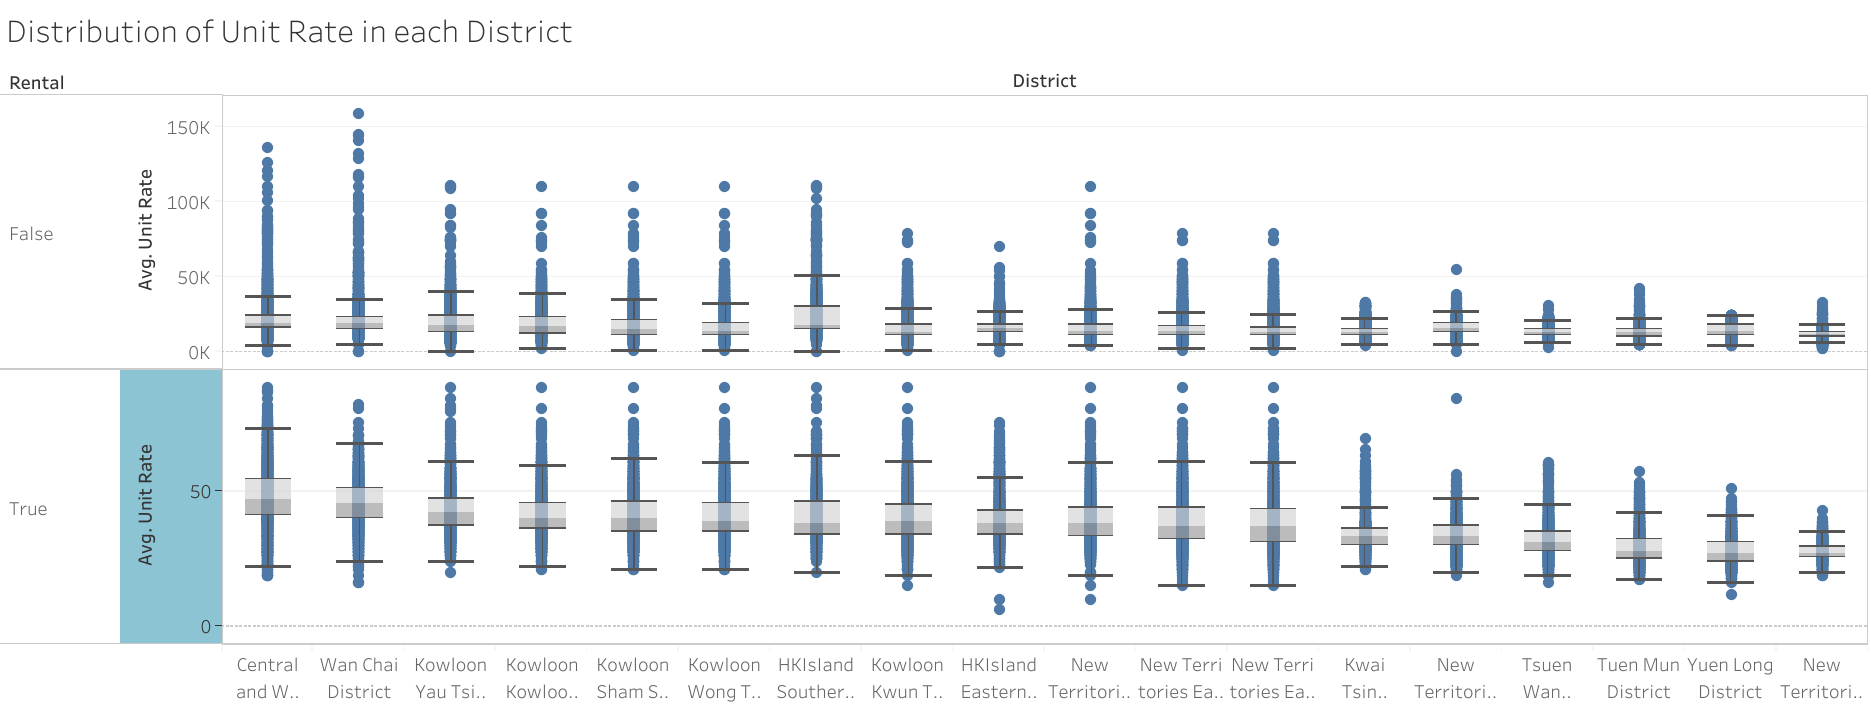

From this graph, we can see that flats in Hong Kong Island have the highest unit price, Kowloon the second, New Territories the last. It is not difficult to explain as Central and Western District, and Wan Chai are inside the central business district, while Kowloon has a high population density, and New Territories are far from the urban area with a low density.
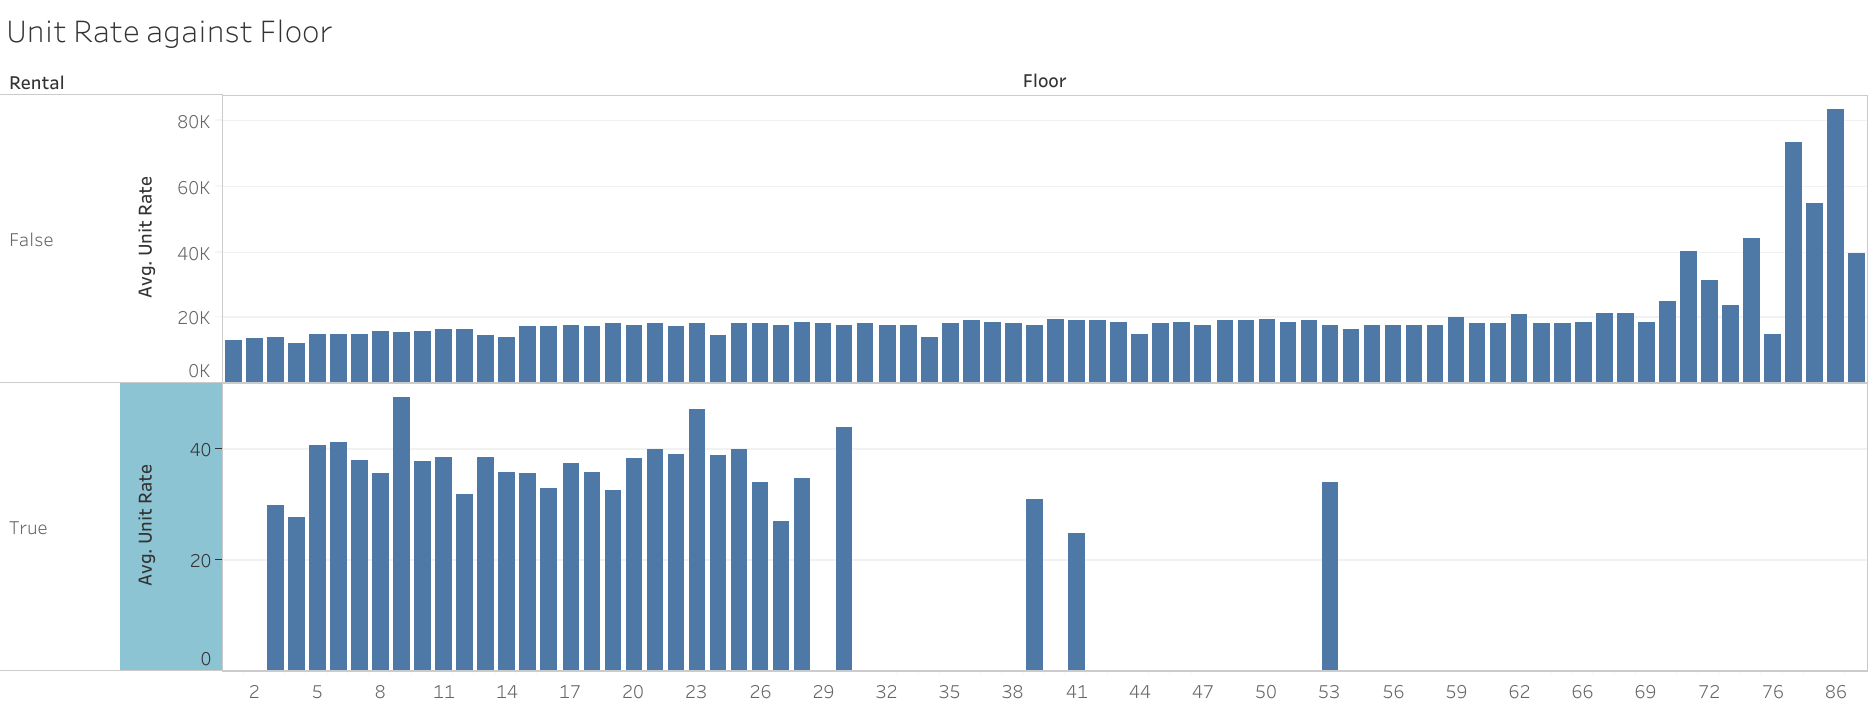

From this graph, the transfer price slightly increases with the floor, because a higher level generally implies good views and fewer mosquitoes. But it is difficult to observe similar relationship for the rental houses.
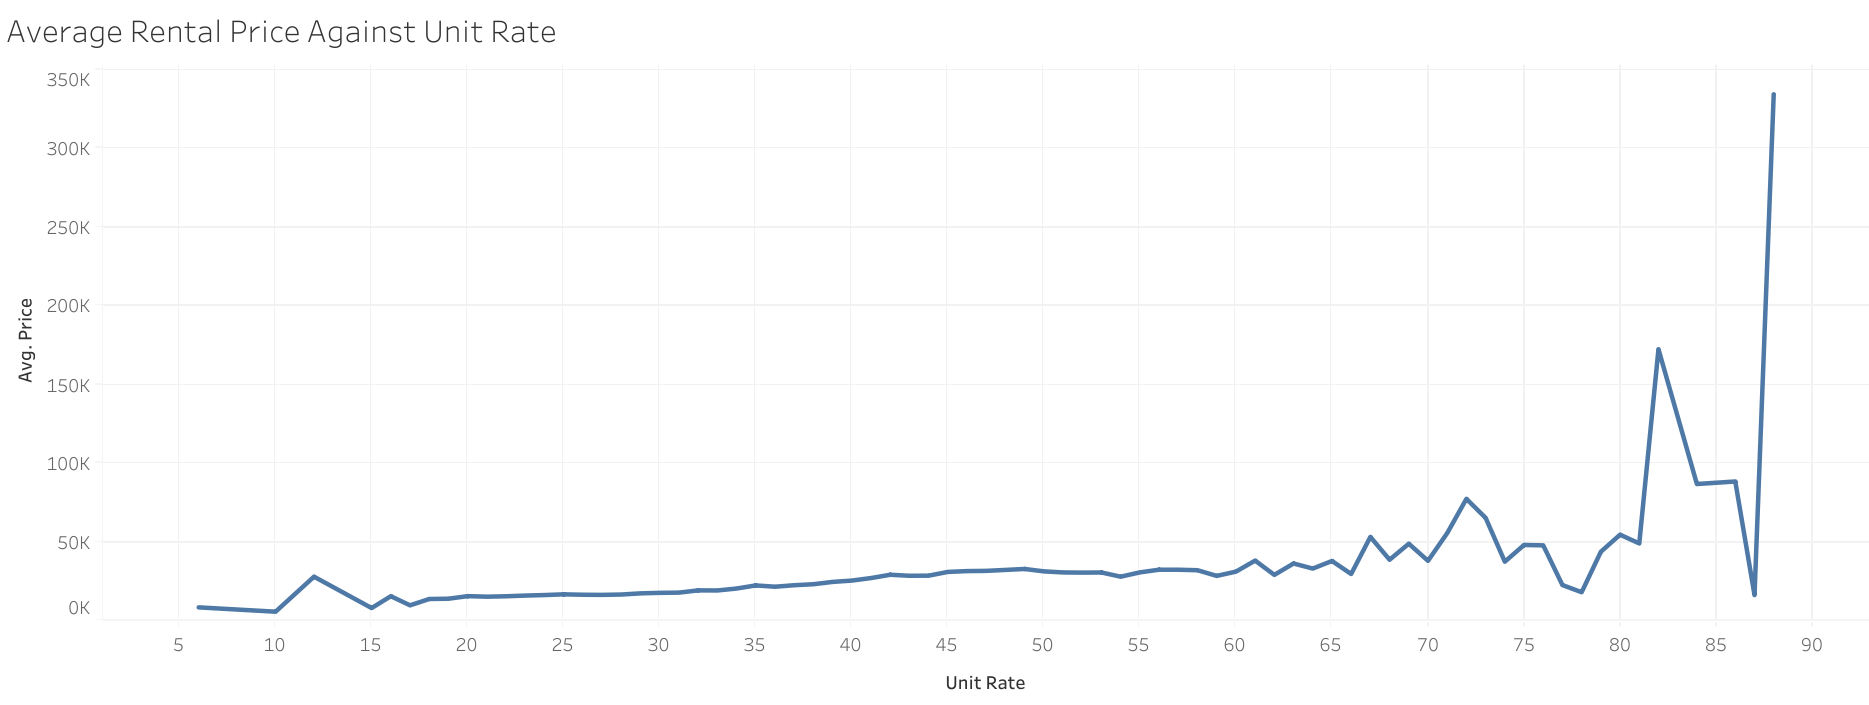

From this graph, we can see that the average rental price increases with unit rate, with some disturbance due to the small sample size on the large unit rate. 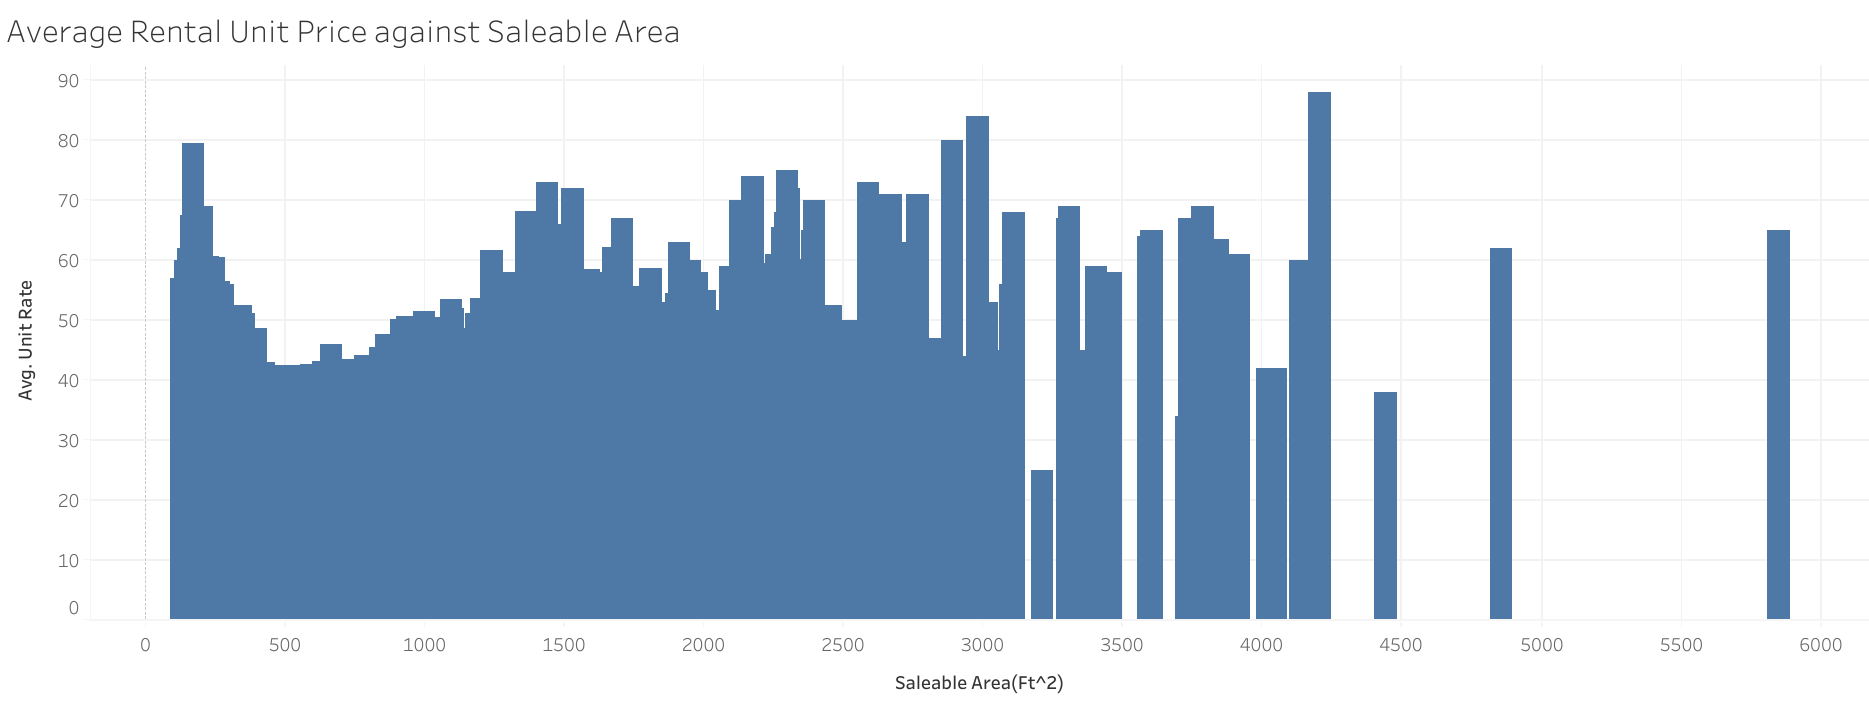

From this graph, it is difficult to observe the relationship between saleable area and unit rate.
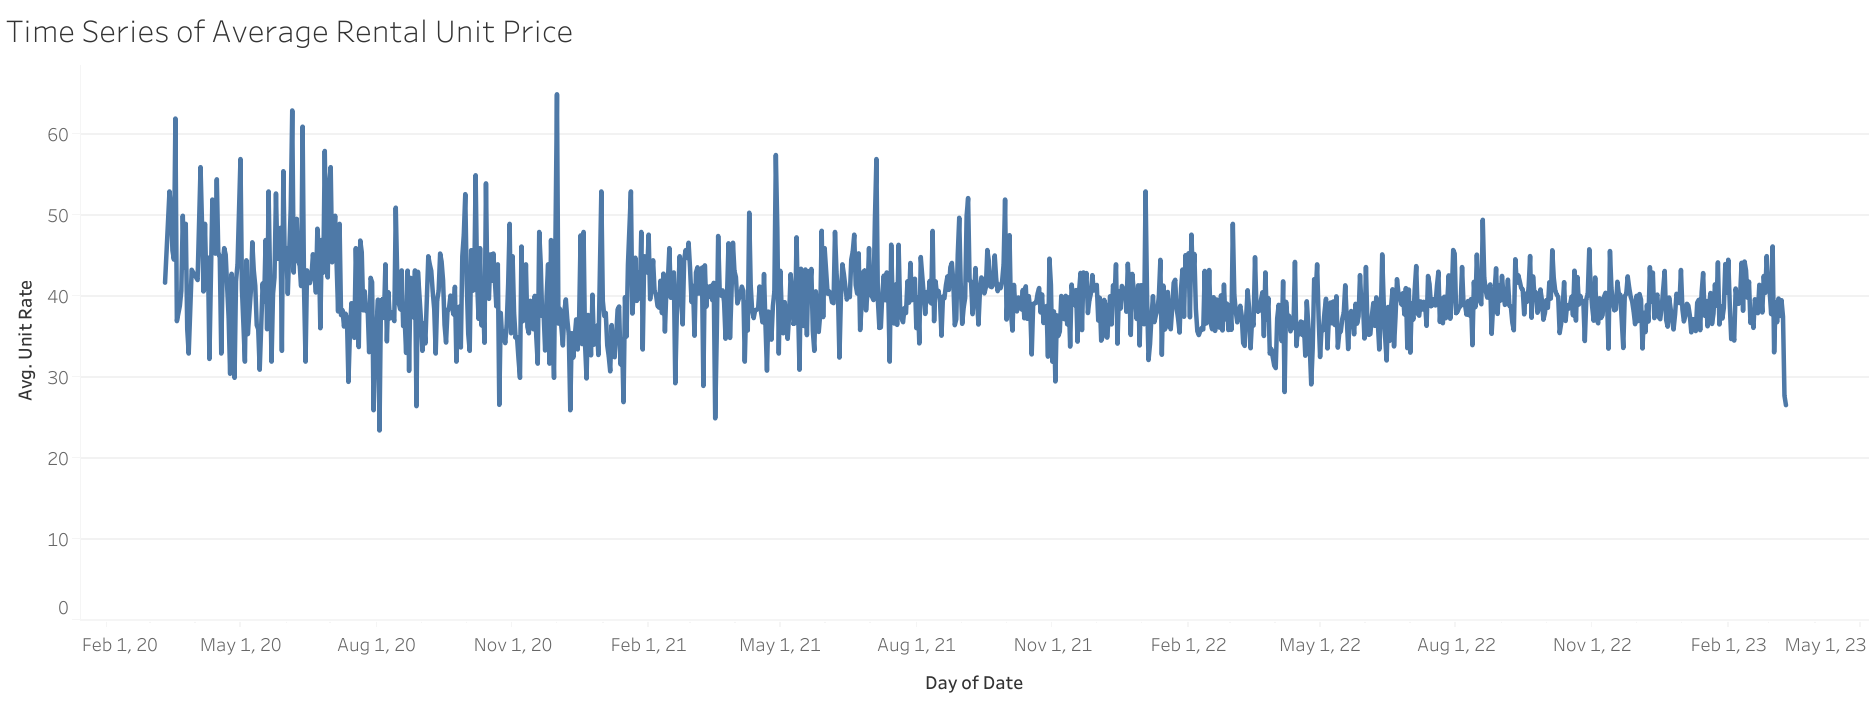

This graph shows that the average rental unit rate each day varies, with a slightly decreasing trend. Hence, using time series to analyse the cycle and trend is good.

# 4. Time Series

As there seems a periodic trend in housing prices, we tried to use a time series to capture the movement of prices. First, we will group the price in average Terms according to the date. Since there are some missing prices, we have to use forward filling to ensure the time series model runs smoothly.

In [ ]:
avg_rent = rent.groupby(['date']).price.mean()
avg_sell = sell.groupby(['date']).price.mean()
avg_rent.index = pd.to_datetime(avg_rent.index, format='%d/%m/%Y')
avg_sell.index = pd.to_datetime(avg_sell.index, format='%d/%m/%Y')
avg_sell = avg_sell.sort_index()
avg_rent = avg_rent.sort_index()

In [ ]:
start_date = min(avg_rent.index.min(), avg_sell.index.min())
end_date = max(avg_rent.index.max(), avg_sell.index.max())
all_dates = pd.date_range(start=start_date, end=end_date)
avg_rent = avg_rent.reindex(all_dates)
avg_sell = avg_sell.reindex(all_dates)
rent_na = avg_rent.isna().sum()
sell_na = avg_sell.isna().sum()
avg_rent.fillna(method='ffill', inplace=True)
avg_sell.fillna(method='ffill', inplace=True)
avg_rent_df = avg_rent.reset_index()
avg_sell_df = avg_sell.reset_index()
avg_rent_df.columns = ['date', 'avg_rent']
avg_sell_df.columns = ['date', 'avg_sell']
avg_rent_df.set_index(pd.PeriodIndex(avg_rent_df['date'], freq='D'), inplace=True)
avg_sell_df.set_index(pd.PeriodIndex(avg_sell_df['date'], freq='D'), inplace=True)
avg_rent_df.drop(columns='date', inplace=True)
avg_sell_df.drop(columns='date', inplace=True)
avg_rent_df


avg_rent
date                    
2020-03-10  25387.500000
2020-03-11  25387.500000
2020-03-12  25387.500000
2020-03-13  24000.000000
2020-03-14  30000.000000
...                  ...
2023-03-07  30734.062500
2023-03-08  21073.988439
2023-03-09  24232.000000
2023-03-10  16508.695652
2023-03-11  16762.500000

[1097 rows x 1 columns]

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
       loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

In [ ]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
[
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


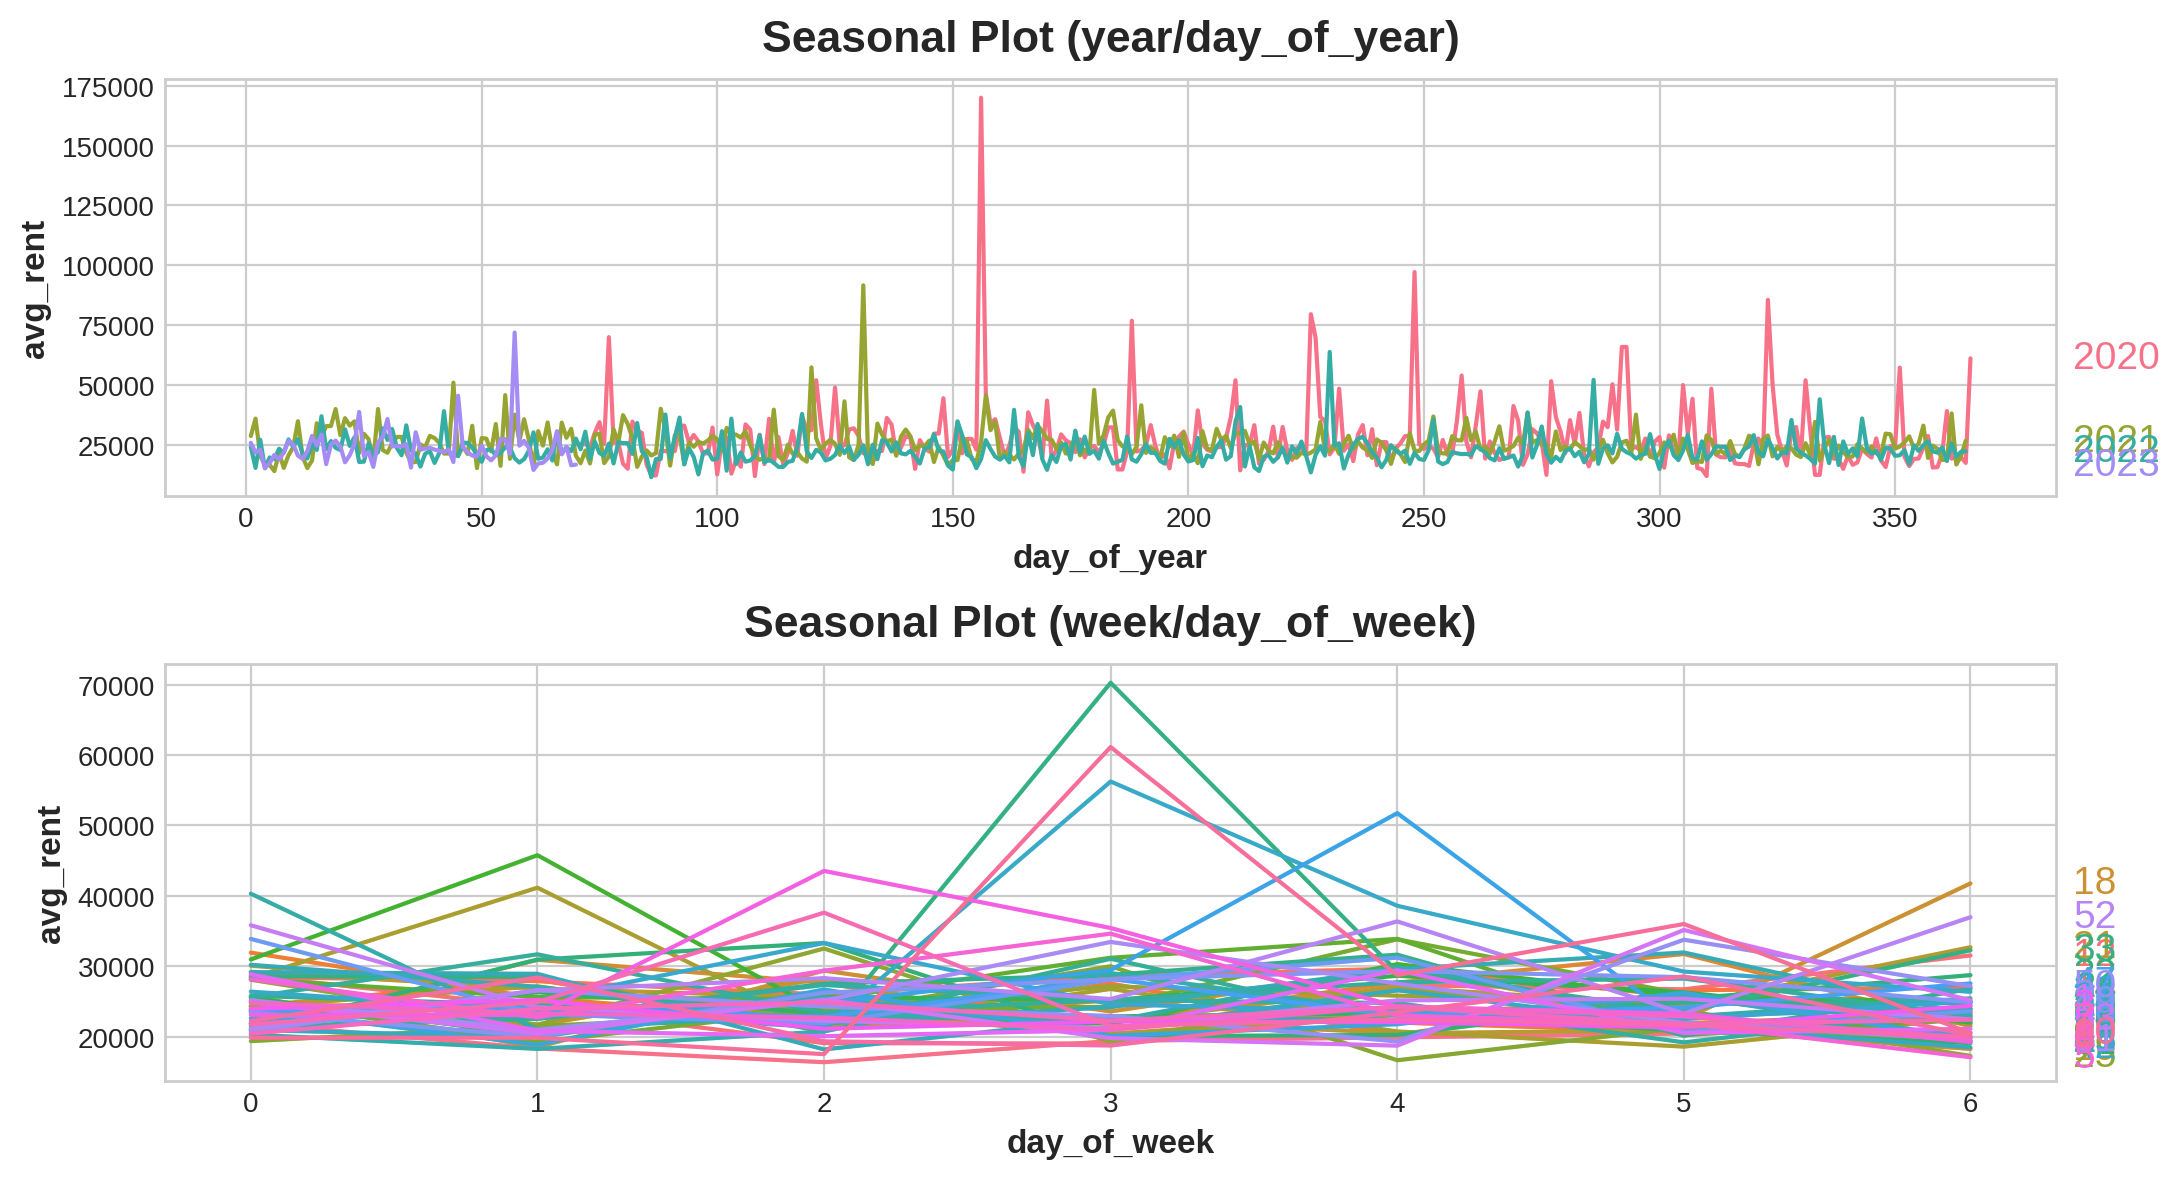

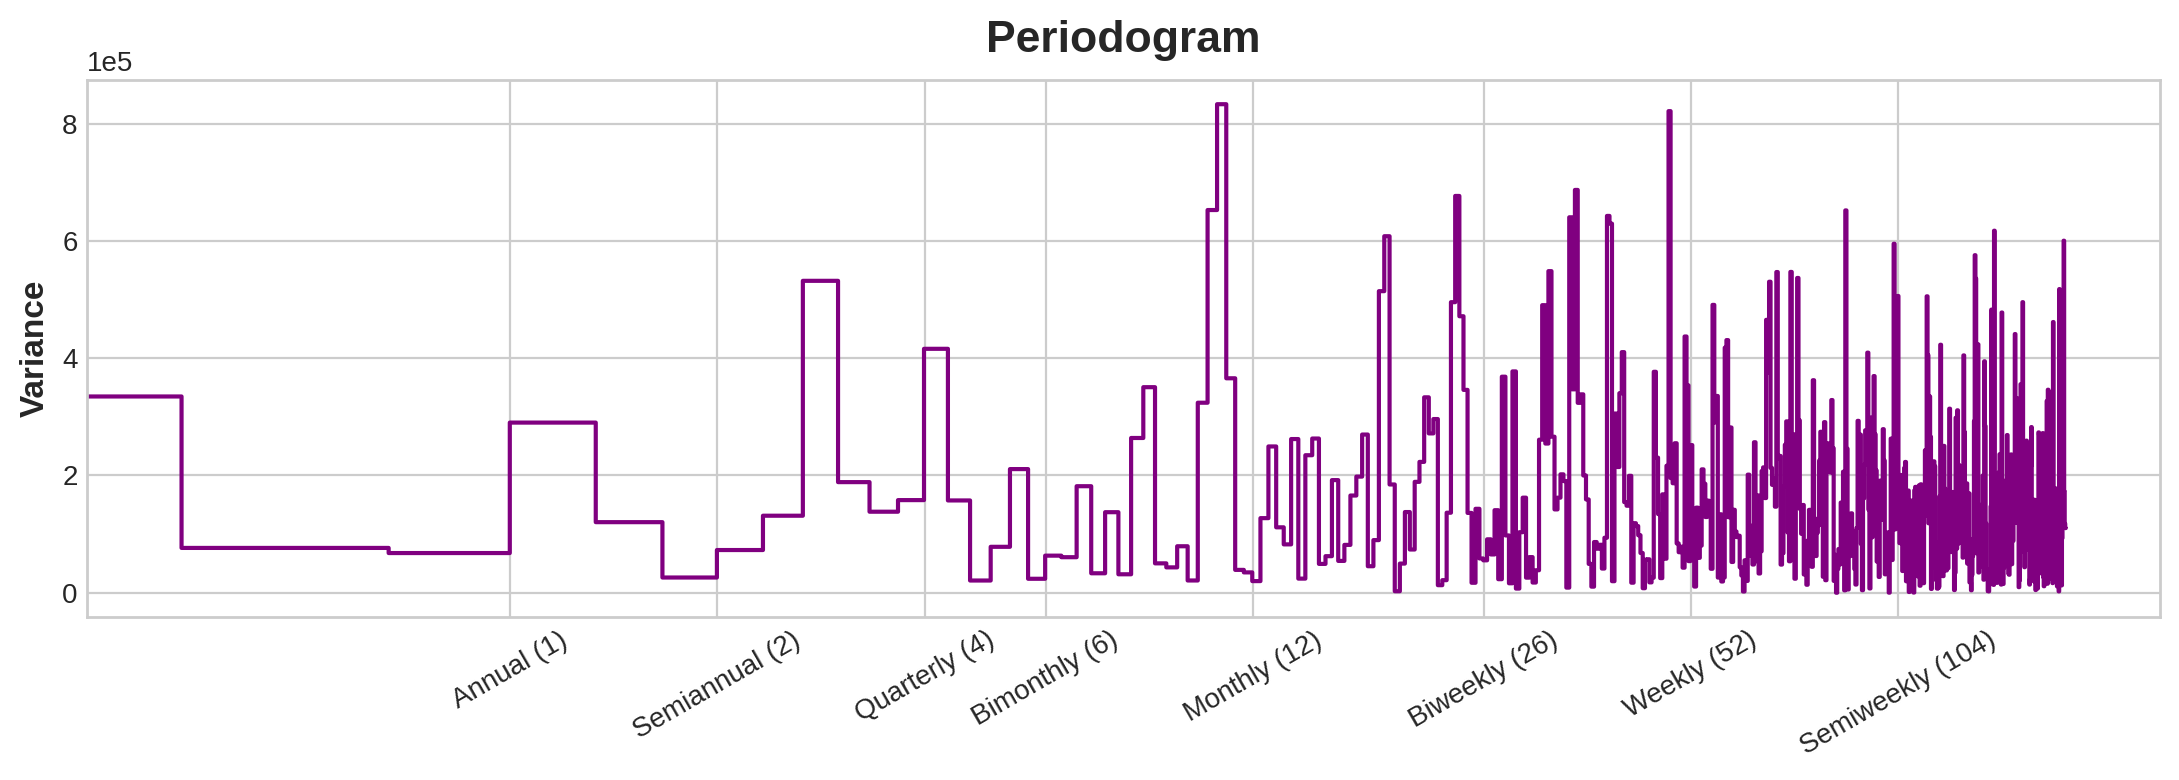

In [ ]:
avg_rent_df['day_of_week'] = avg_rent_df.index.dayofweek
avg_rent_df['week'] = avg_rent_df.index.week
avg_rent_df['day_of_year'] = avg_rent_df.index.dayofyear
avg_rent_df['year'] = avg_rent_df.index.year
sample_rent = avg_rent_df.loc[:,]
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (11, 6))
seasonal_plot(sample_rent, y = "avg_rent", period = "year", freq = "day_of_year", ax = ax0)
seasonal_plot(sample_rent, y = "avg_rent", period = "week", freq = "day_of_week", ax = ax1)
plot_periodogram(avg_rent_df.avg_rent);

**A. Periodic Plot**

The seasonal plot of rental prices did not give a clue for the period of prices, since the three peaks on Wednesday are likely to be outliers, in more than 150 weeks. From the periodogram, we can see peaks of variance near monthly, and in smaller occasions. Similar patterns are also been observed in the transfer price.

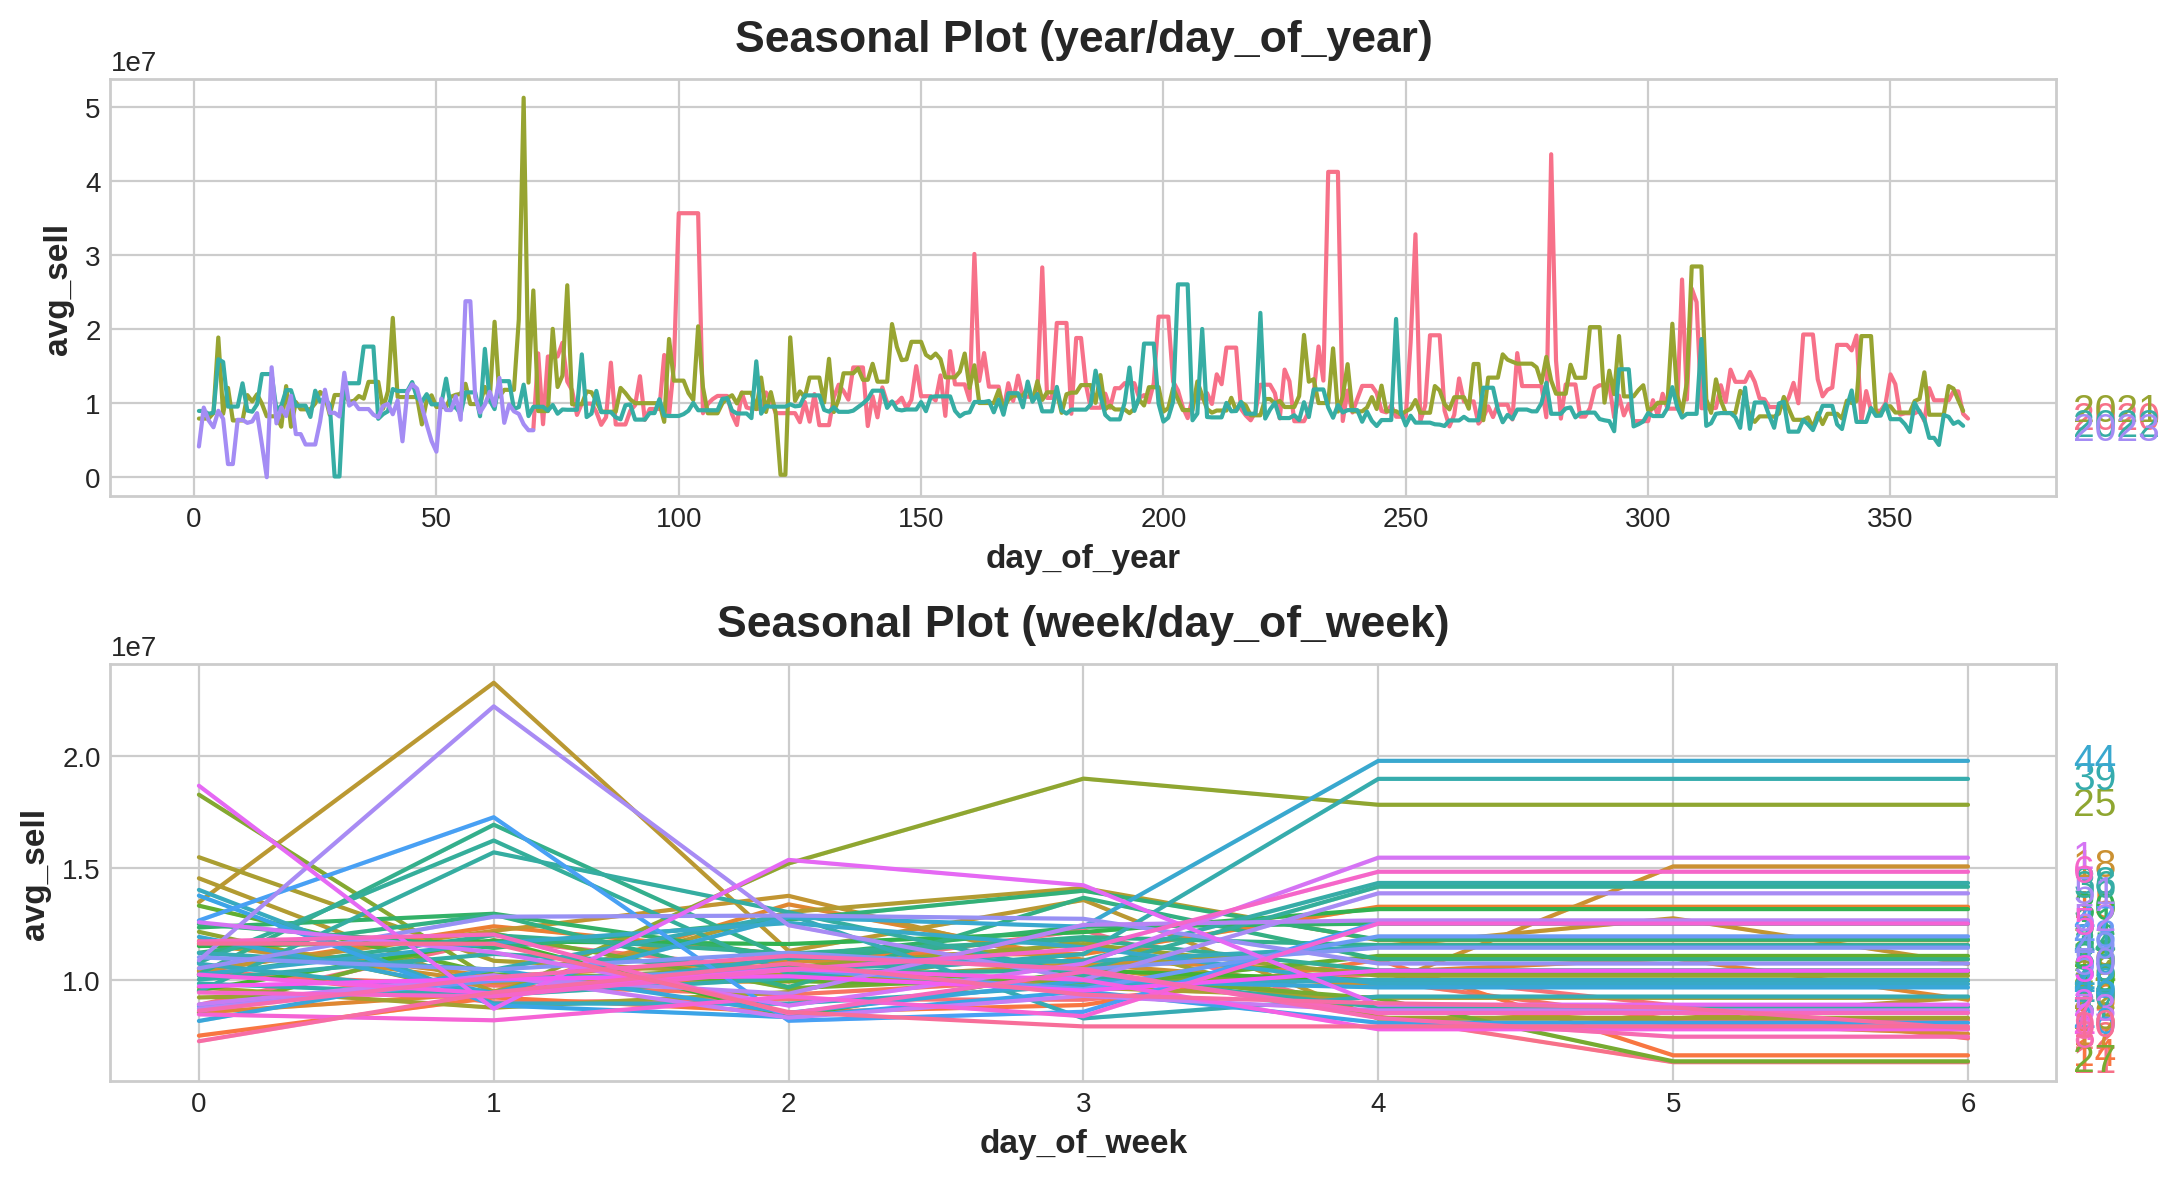

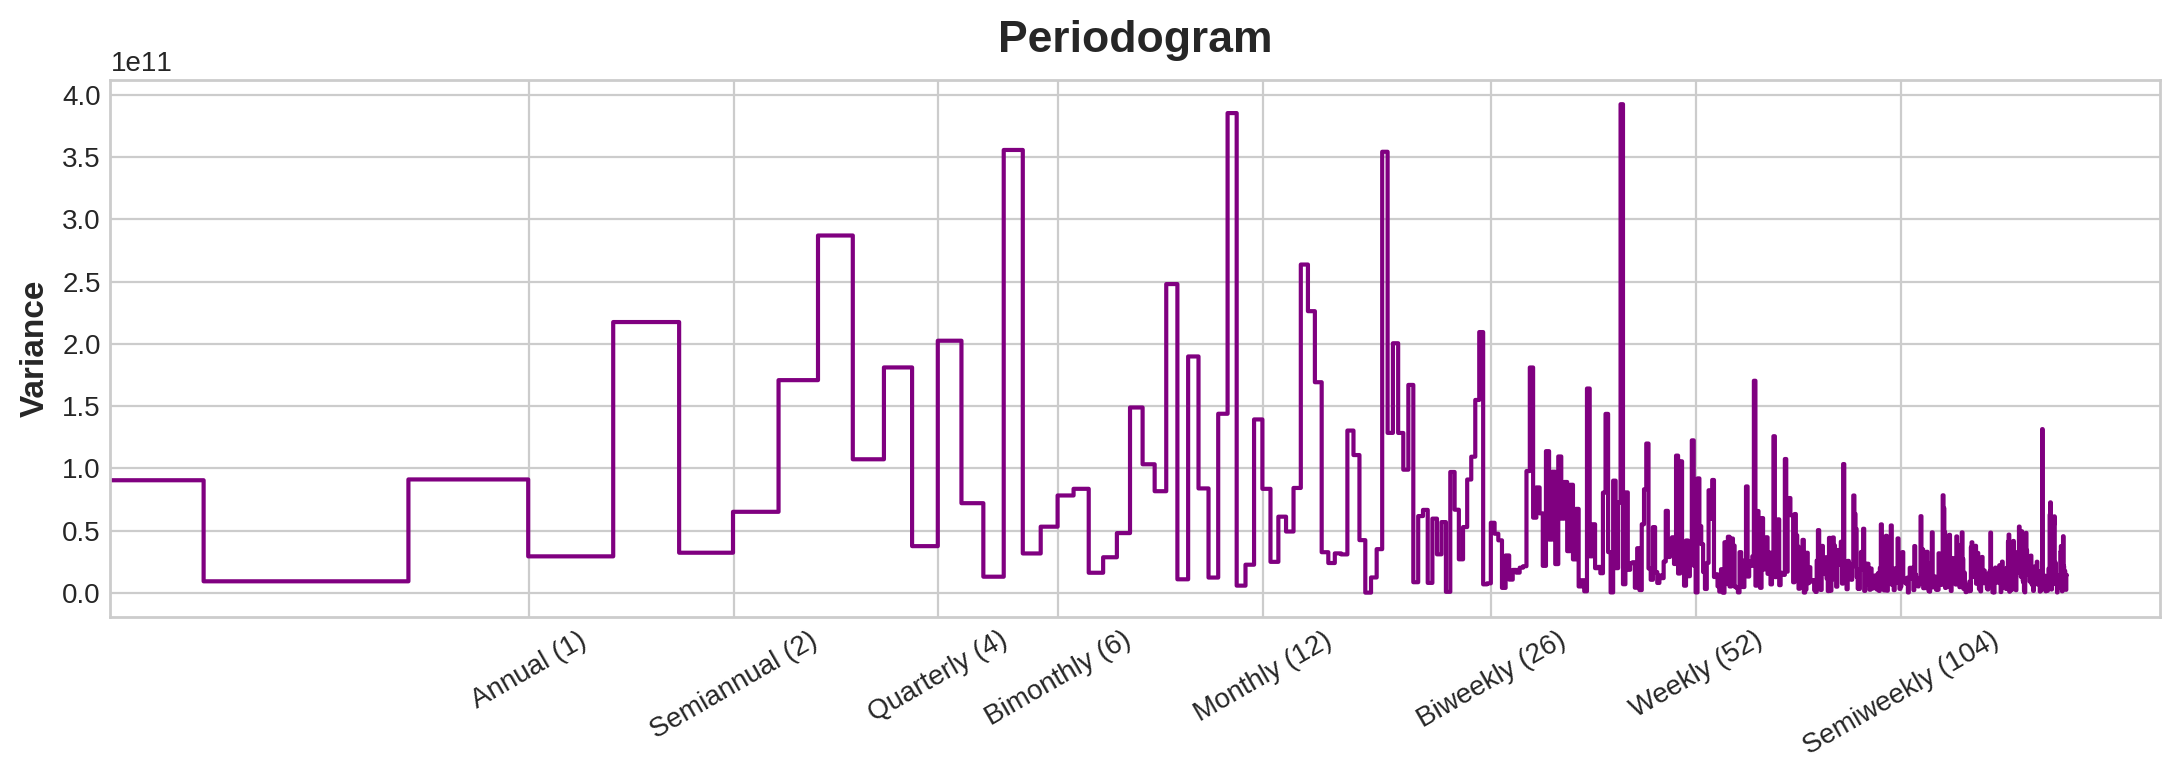

In [ ]:
avg_sell_df['day_of_week'] = avg_sell_df.index.dayofweek
avg_sell_df['week'] = avg_sell_df.index.week
avg_sell_df['day_of_year'] = avg_sell_df.index.dayofyear
avg_sell_df['year'] = avg_sell_df.index.year
sample_sell = avg_sell_df.loc[:,]
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (11, 6))
seasonal_plot(sample_sell, y = "avg_sell", period = "year", freq = "day_of_year", ax = ax0)
seasonal_plot(sample_sell, y = "avg_sell", period = "week", freq = "day_of_week", ax = ax1)
plot_periodogram(avg_sell_df.avg_sell);


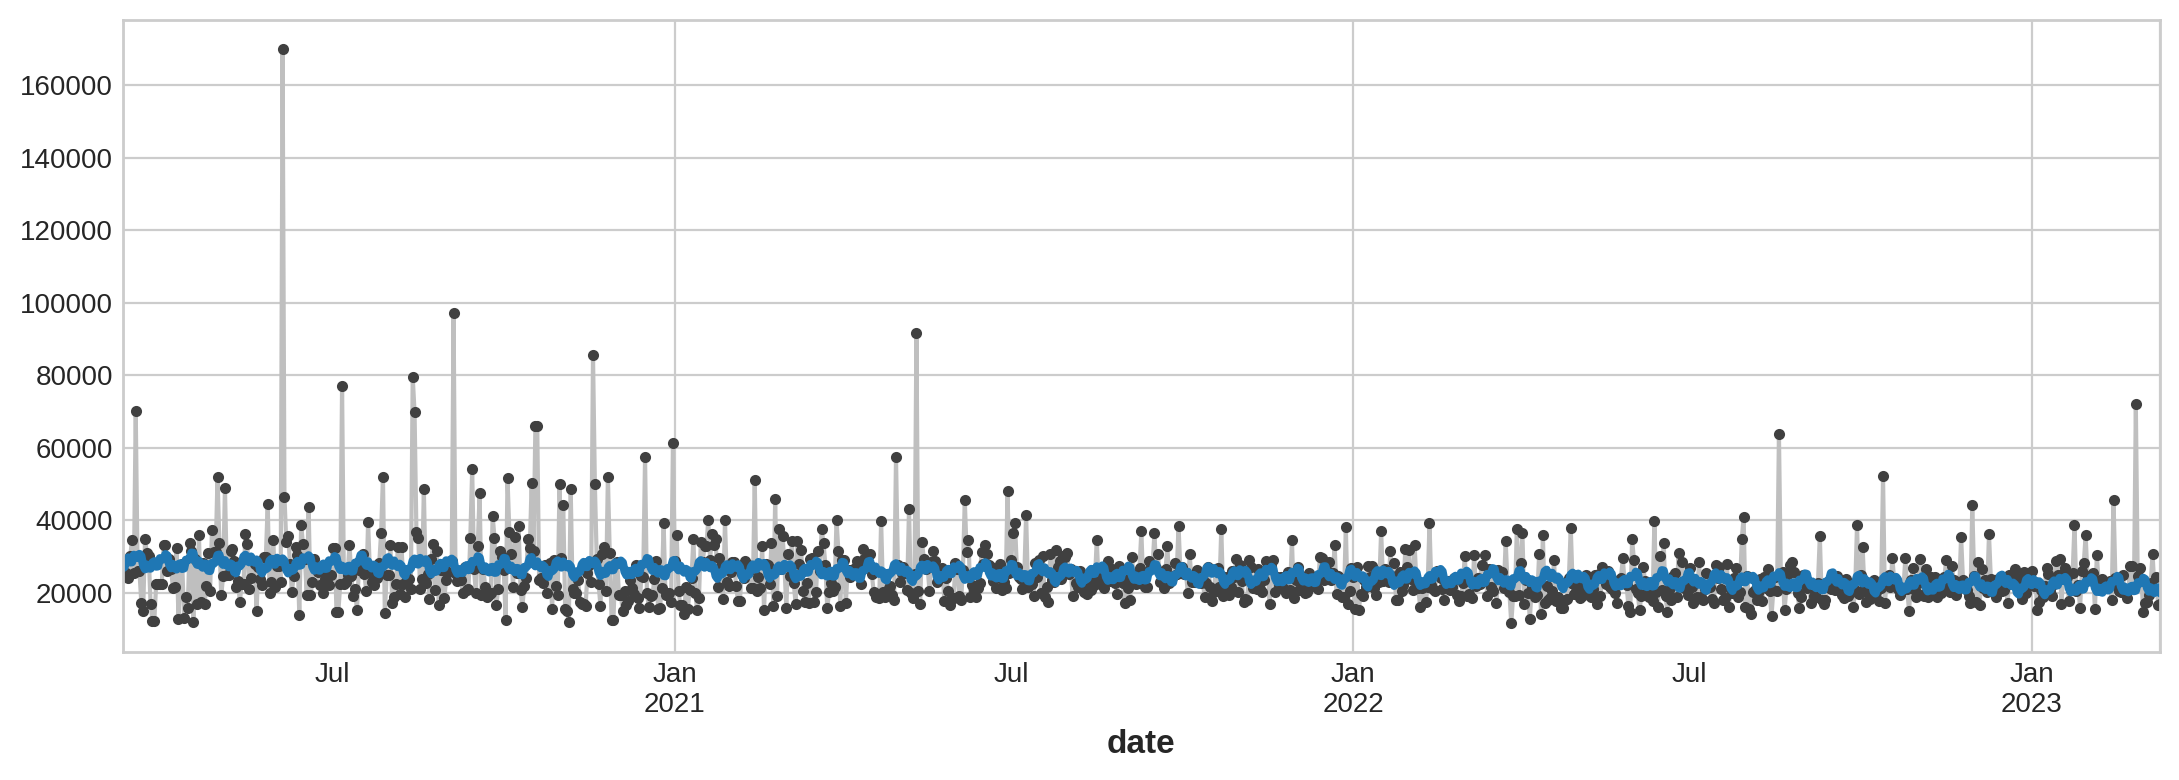

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq = "M", order = 2)
dp_rent = DeterministicProcess(
    index = avg_rent_df.index,
    constant = True,
    order = 1,
    seasonal = True,
    additional_terms = [fourier],
    drop = True
)
X_rent = dp_rent.in_sample()
from sklearn.linear_model import LinearRegression
y_rent = avg_rent_df["avg_rent"]
model_rent = LinearRegression(fit_intercept = False)
model_rent.fit(X_rent, y_rent)
y_rent_pred = pd.Series(model_rent.predict(X_rent), index = X_rent.index)
ax = y_rent.plot(**plot_params)
ax = y_rent_pred.plot(ax=ax, linewidth=3)

**B. Fourier Series**

The above plot is for rental price, where grey is the actual average rental price, and blue is the regression line with the Fourier series biweekly. The below diagram is a comparison of the transfer price.

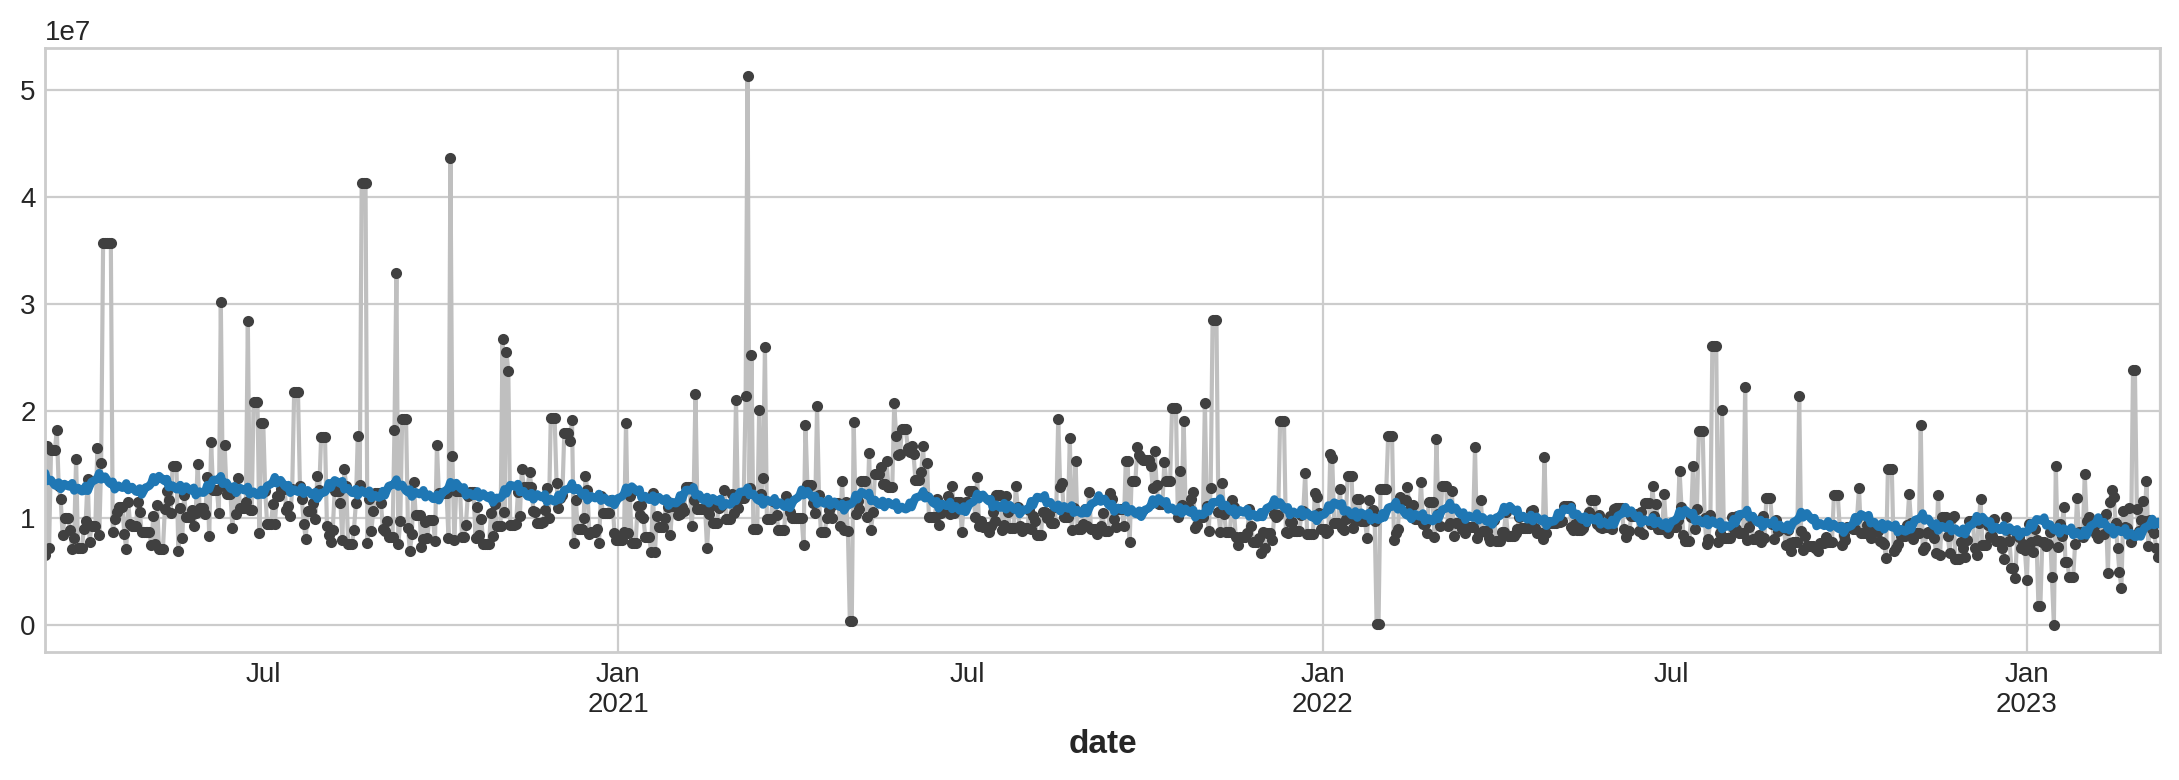

In [ ]:
dp_sell = DeterministicProcess(
    index = avg_sell_df.index,
    constant = True,
    order = 1,
    seasonal = True,
    additional_terms = [fourier],
    drop = True
)
X_sell = dp_sell.in_sample()
from sklearn.linear_model import LinearRegression
y_sell = avg_sell_df["avg_sell"]
model_sell = LinearRegression(fit_intercept = False)
model_sell.fit(X_sell, y_sell)
y_sell_pred = pd.Series(model_sell.predict(X_sell), index = X_sell.index)
ax = y_sell.plot(**plot_params)
ax = y_sell_pred.plot(ax=ax, linewidth=3)

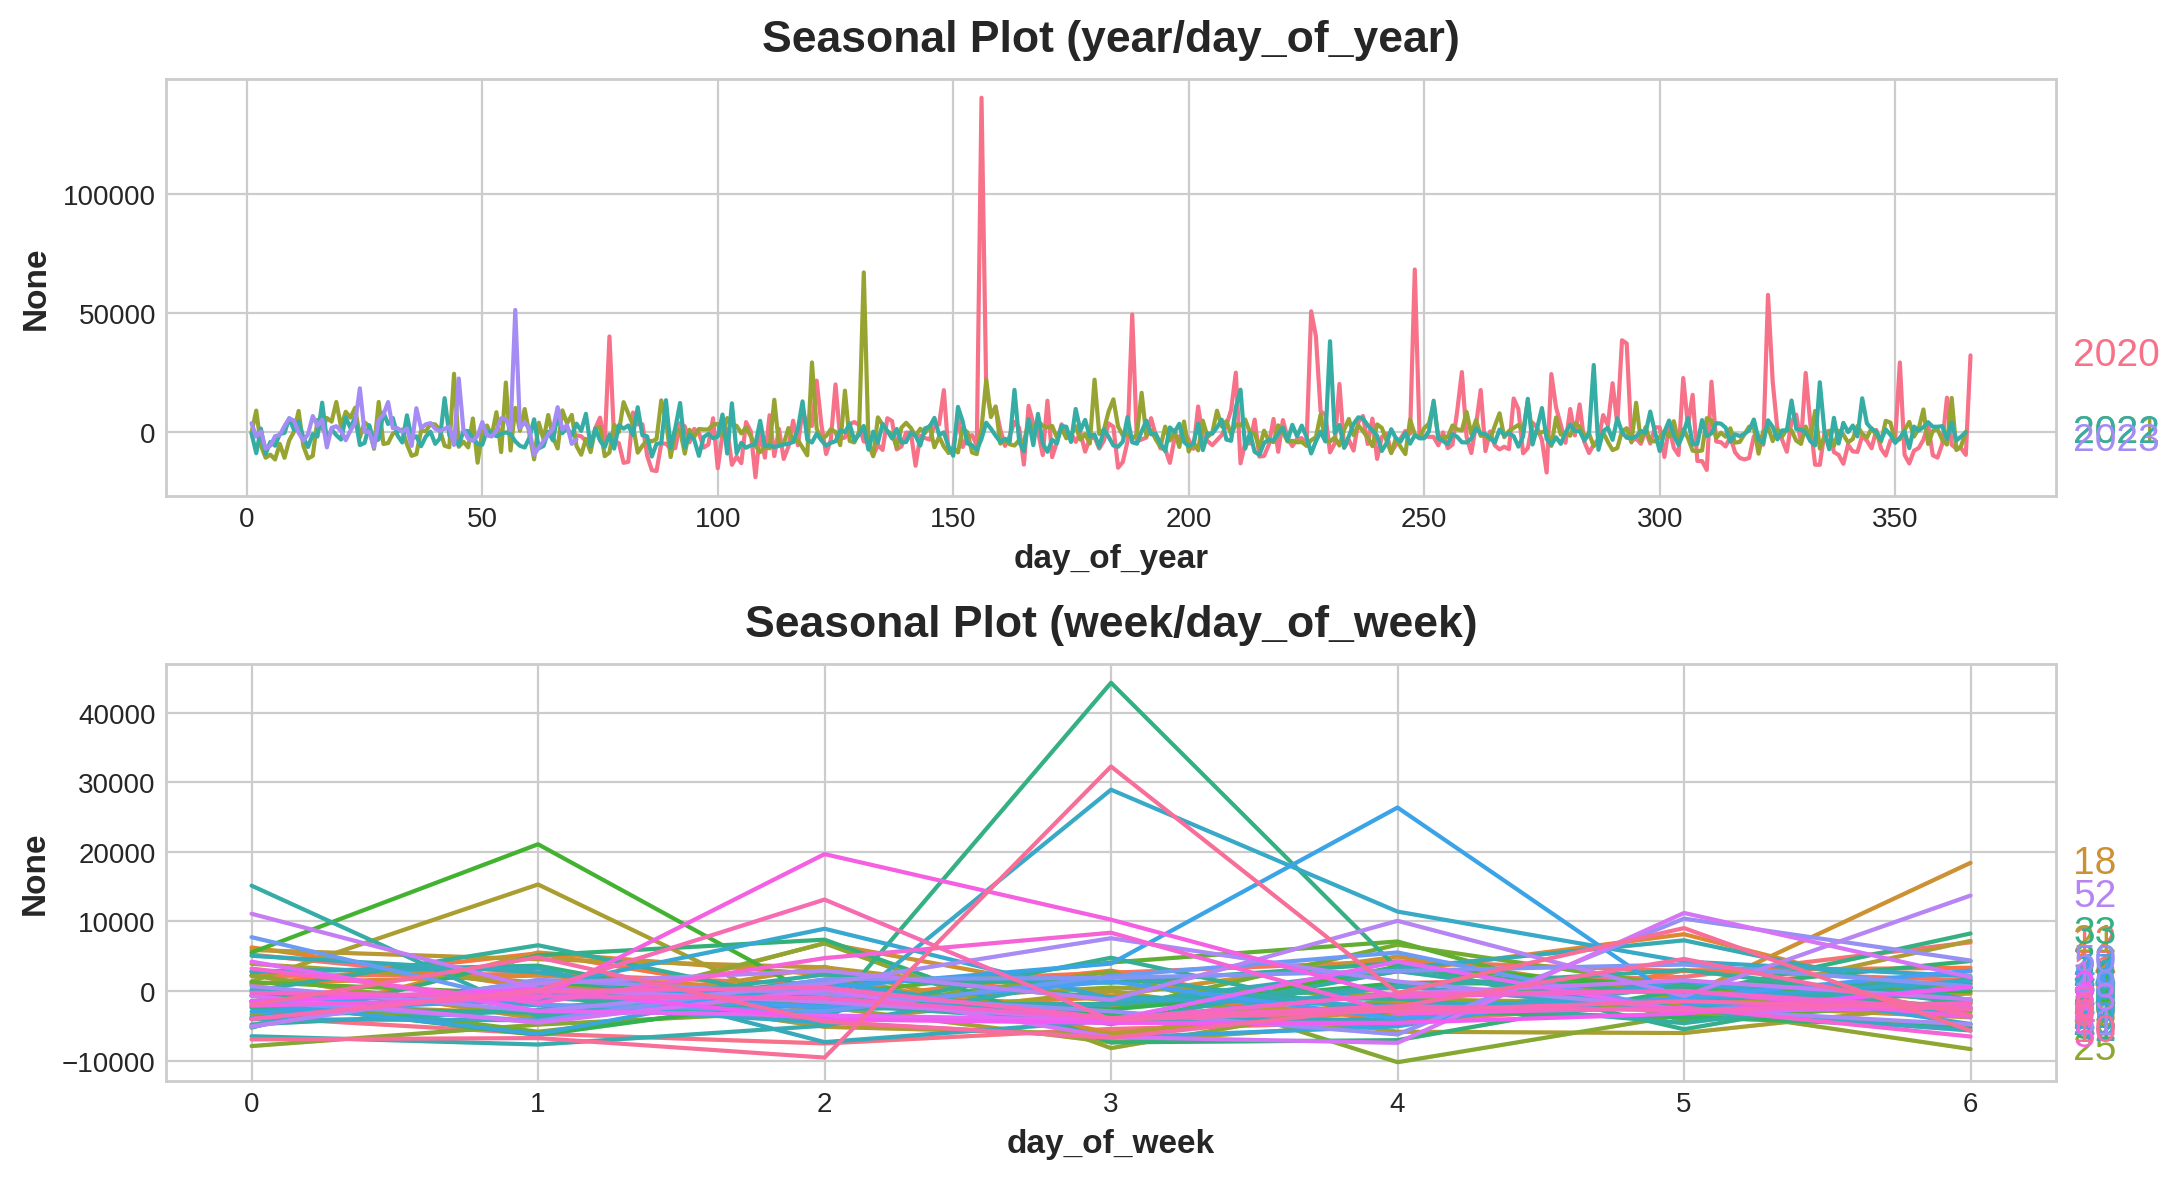

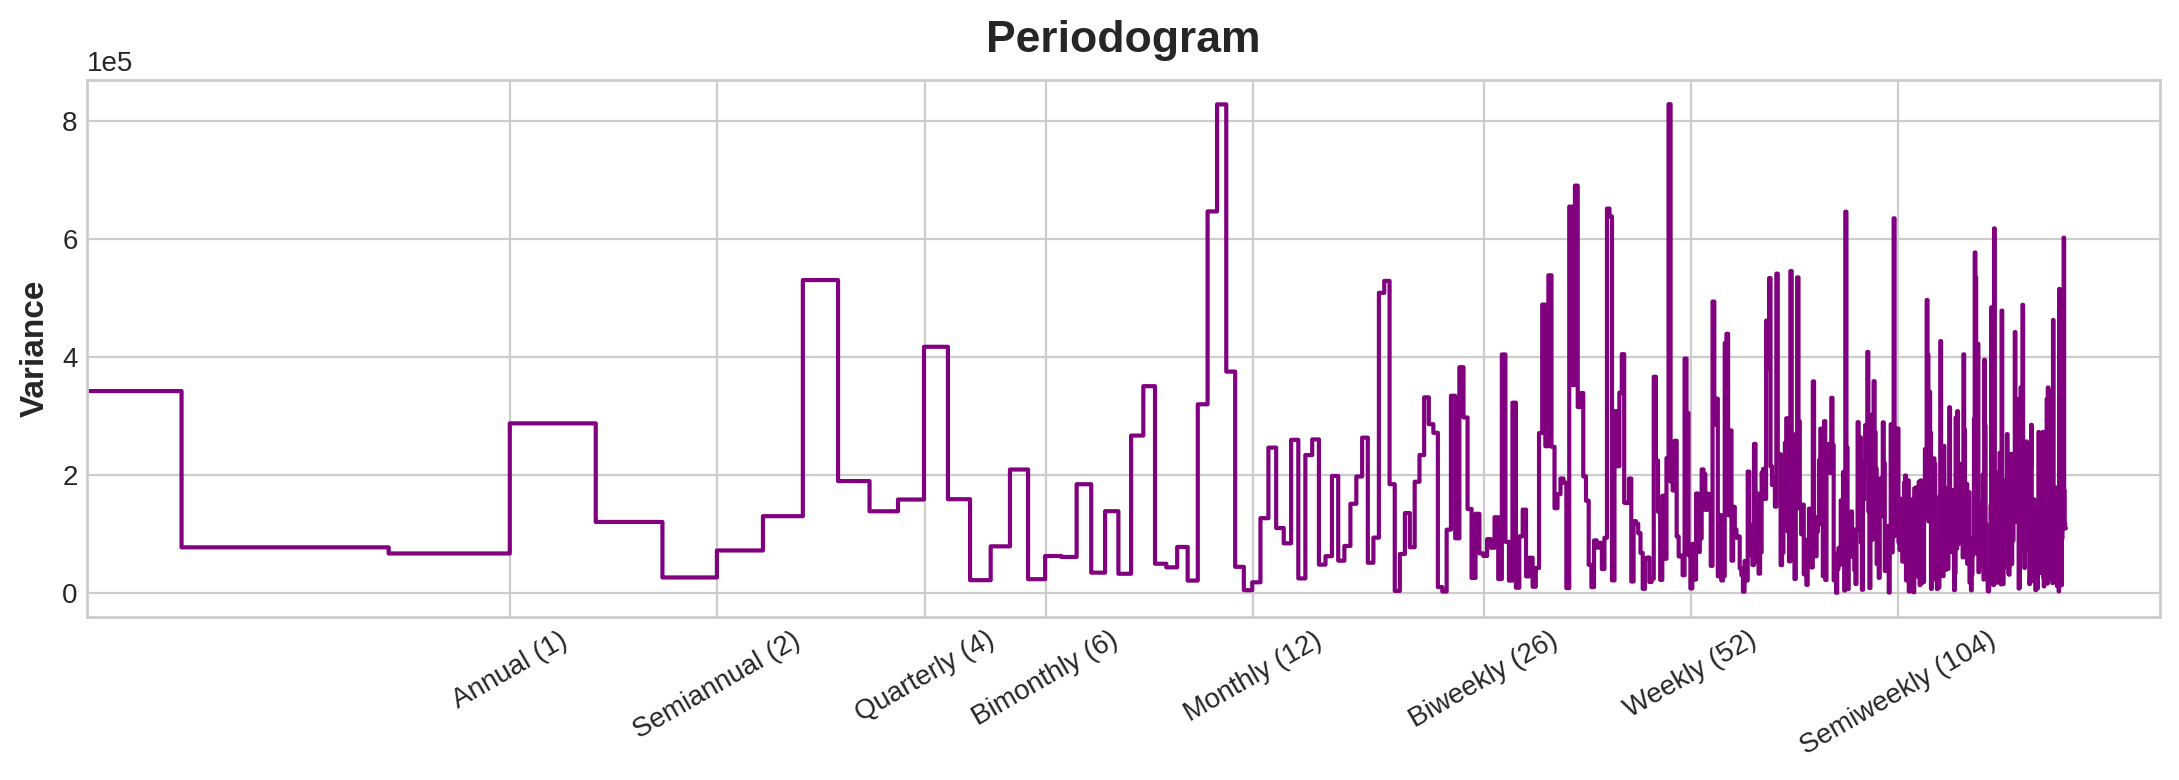

In [ ]:
y_rent_deseason = y_rent - y_rent_pred
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (11, 6))
seasonal_plot(sample_rent, y = y_rent_deseason, period = "year", freq = "day_of_year", ax = ax0)
seasonal_plot(sample_rent, y = y_rent_deseason, period = "week", freq = "day_of_week", ax = ax1)
plot_periodogram(y_rent_deseason);

**C. Residual Analysis**

The above seasonal plot and periodogram show the seasonality for the residual rental price. Unfortunately, the diagrams are very similar to the one before running the model, with similar residuals. Since the transfer price also has this problem, we will not use the Fourier series to model the housing prices.

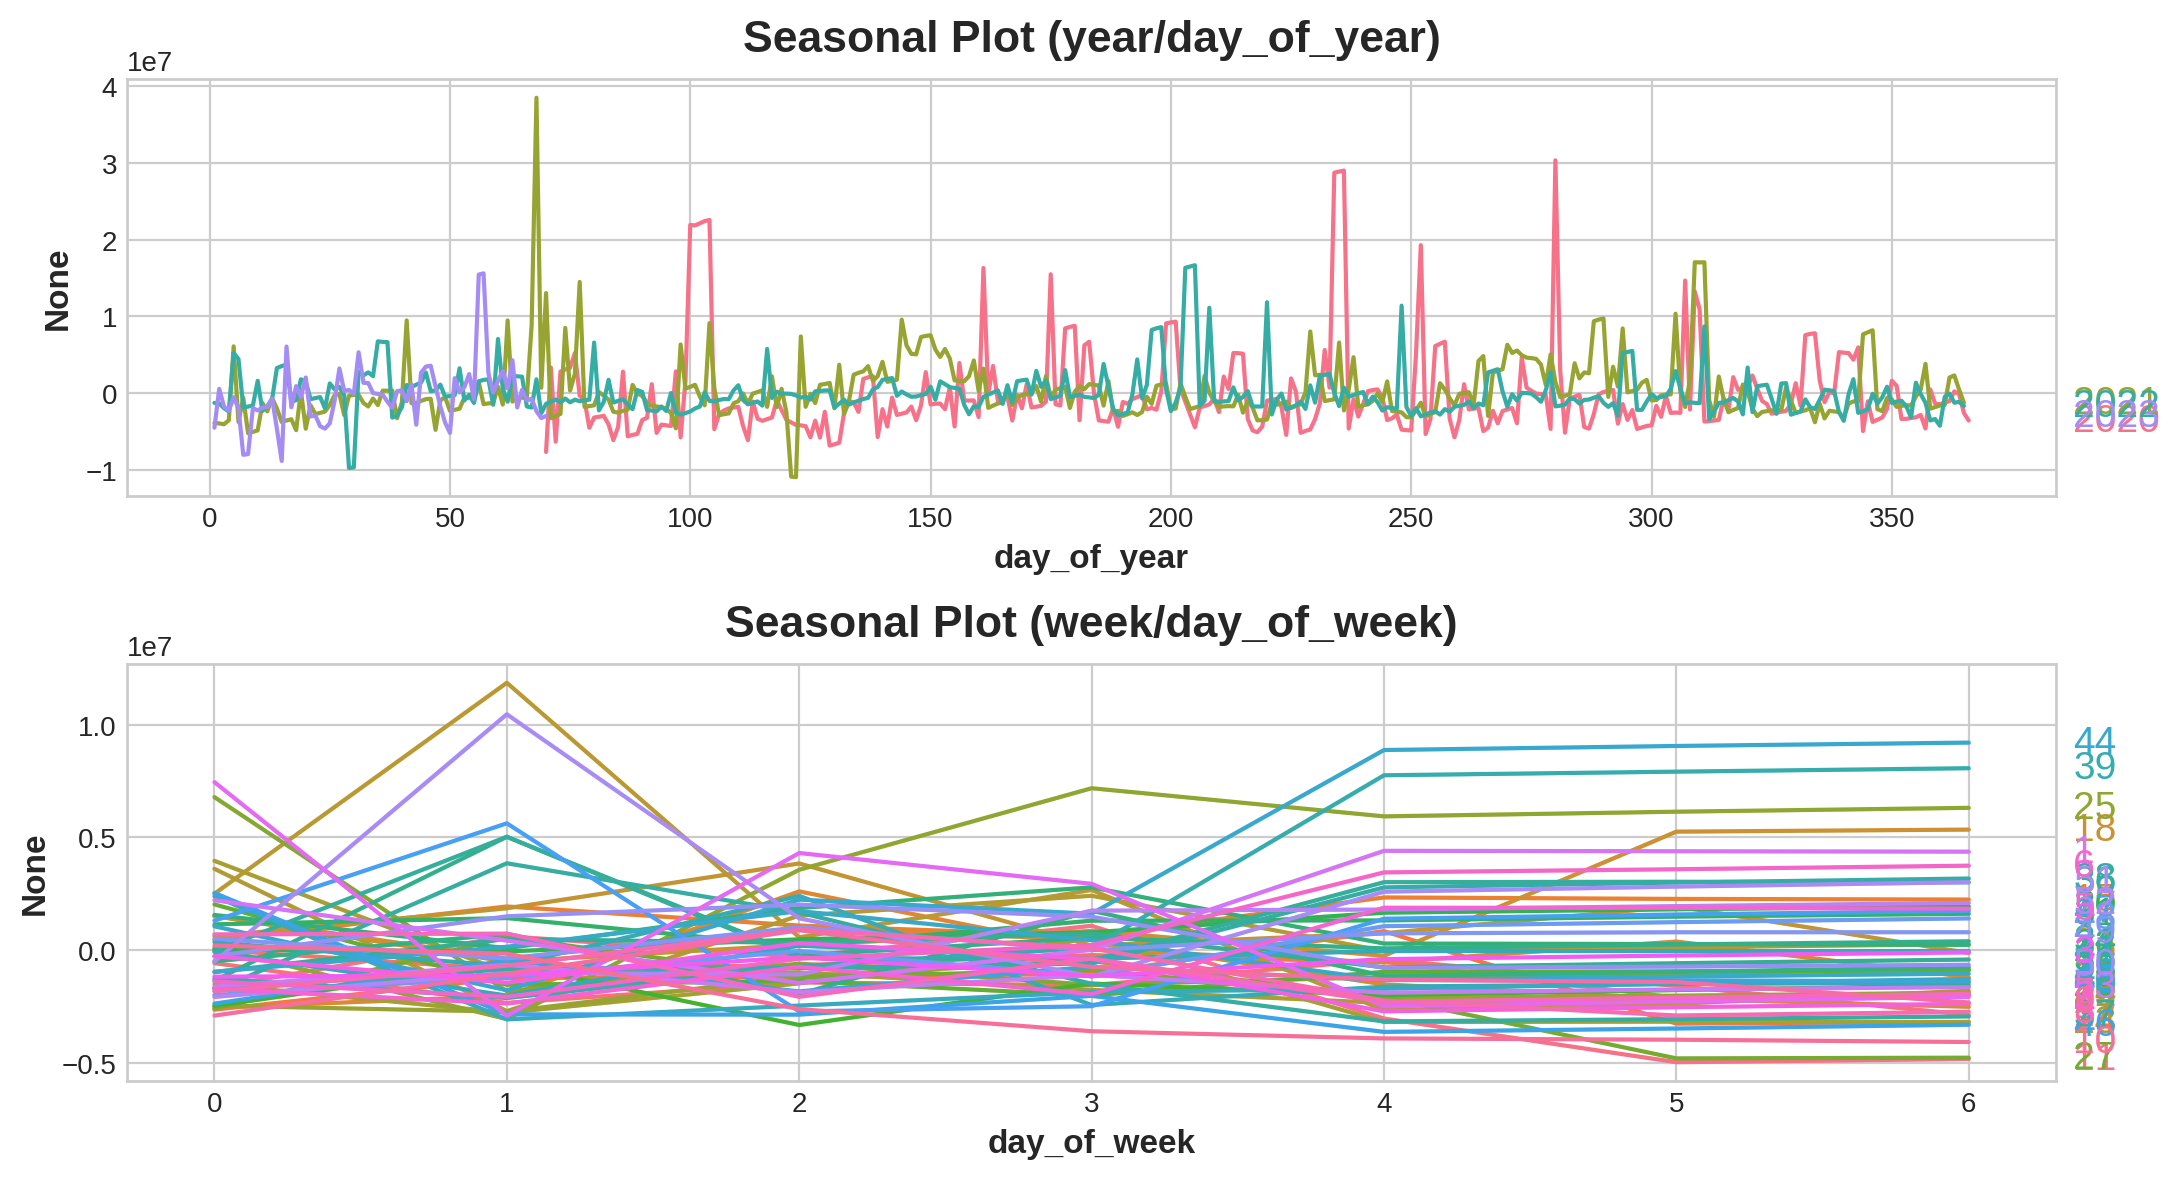

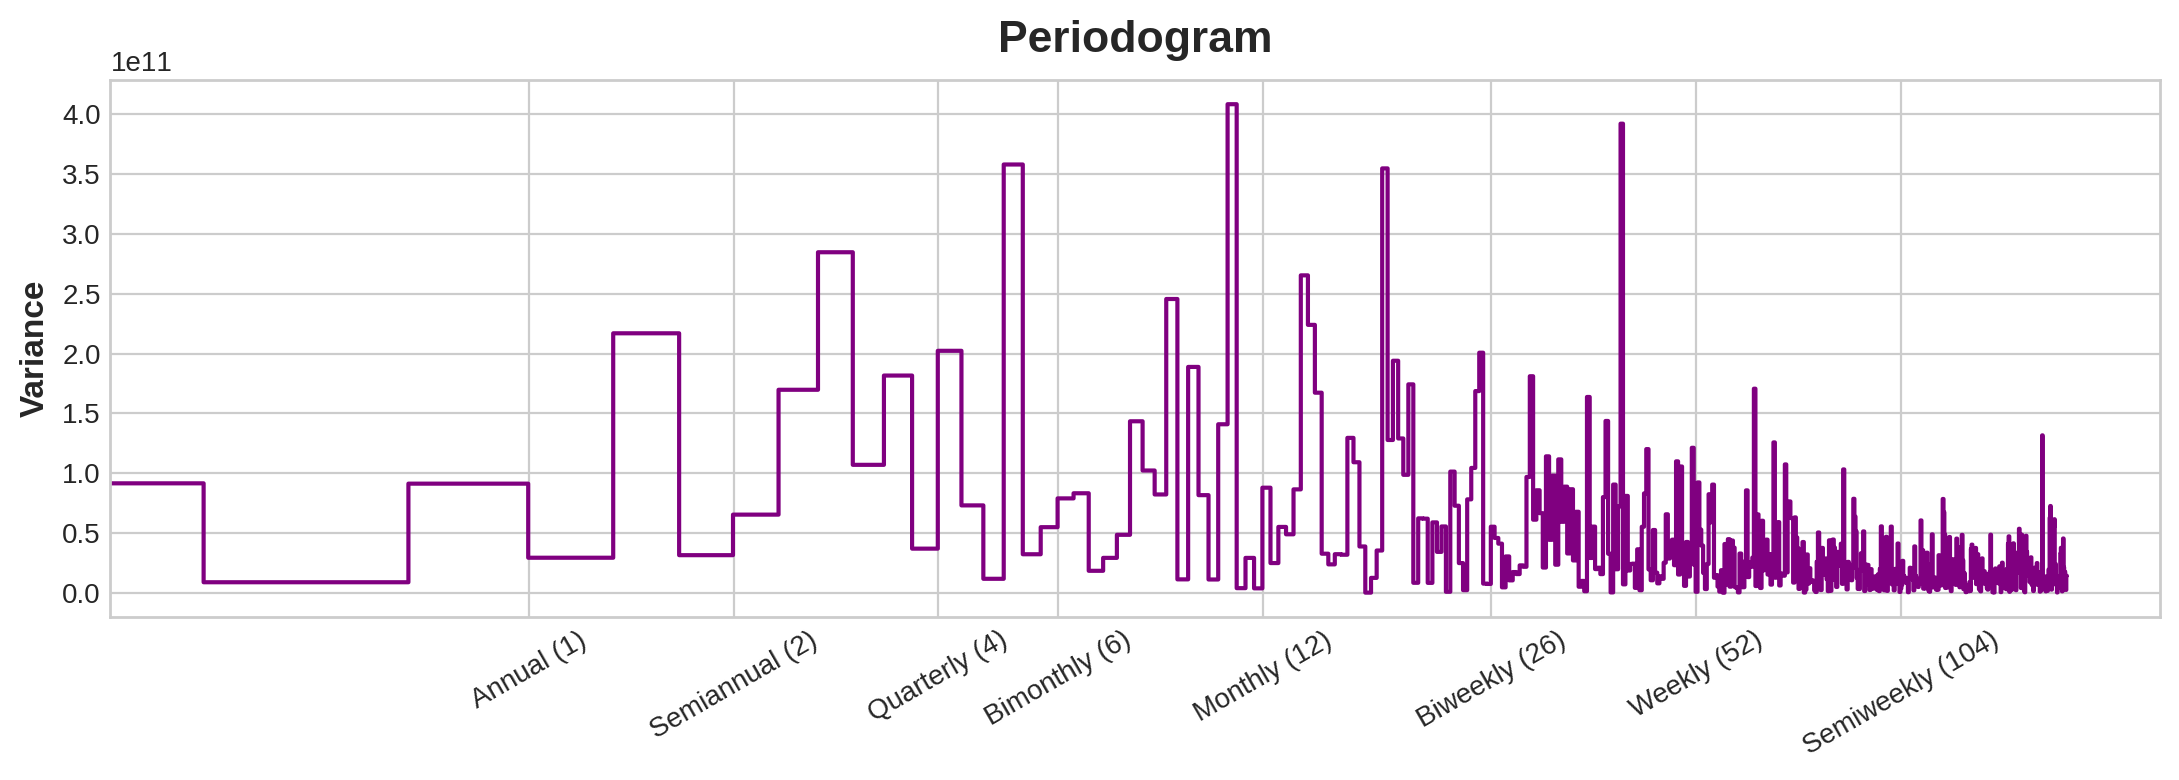

In [ ]:
y_sell_deseason = y_sell - y_sell_pred
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (11, 6))
seasonal_plot(sample_sell, y = y_sell_deseason, period = "year", freq = "day_of_year", ax = ax0)
seasonal_plot(sample_sell, y = y_sell_deseason, period = "week", freq = "day_of_week", ax = ax1)
plot_periodogram(y_sell_deseason);

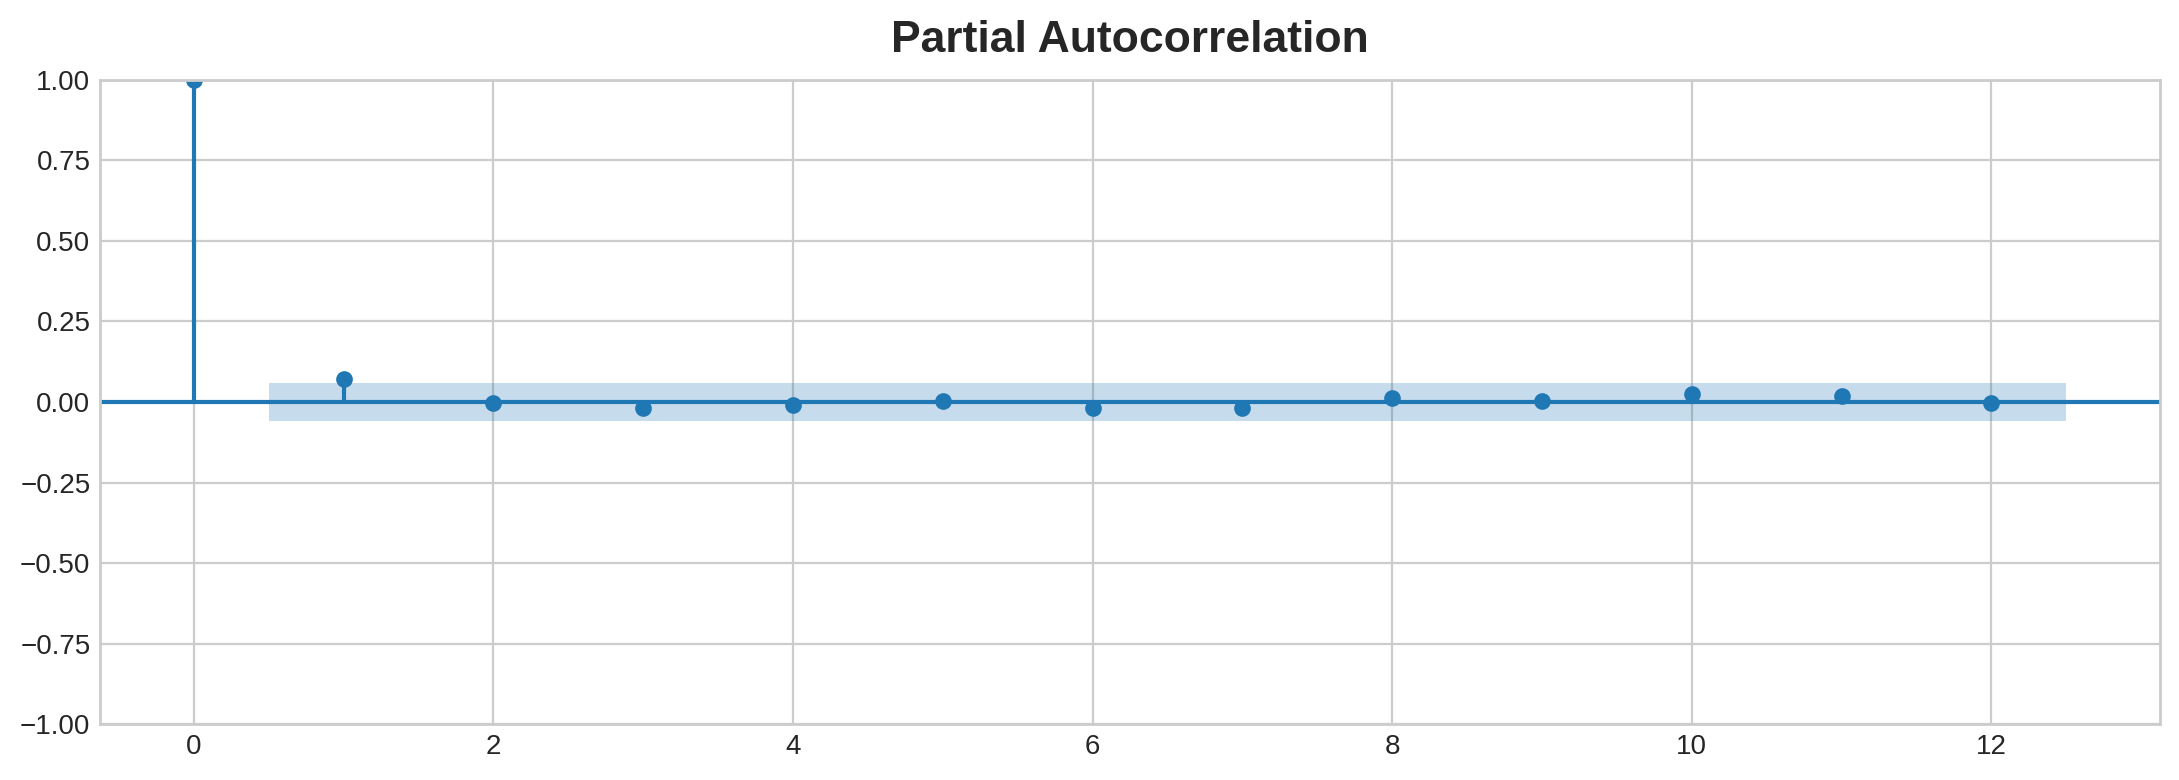

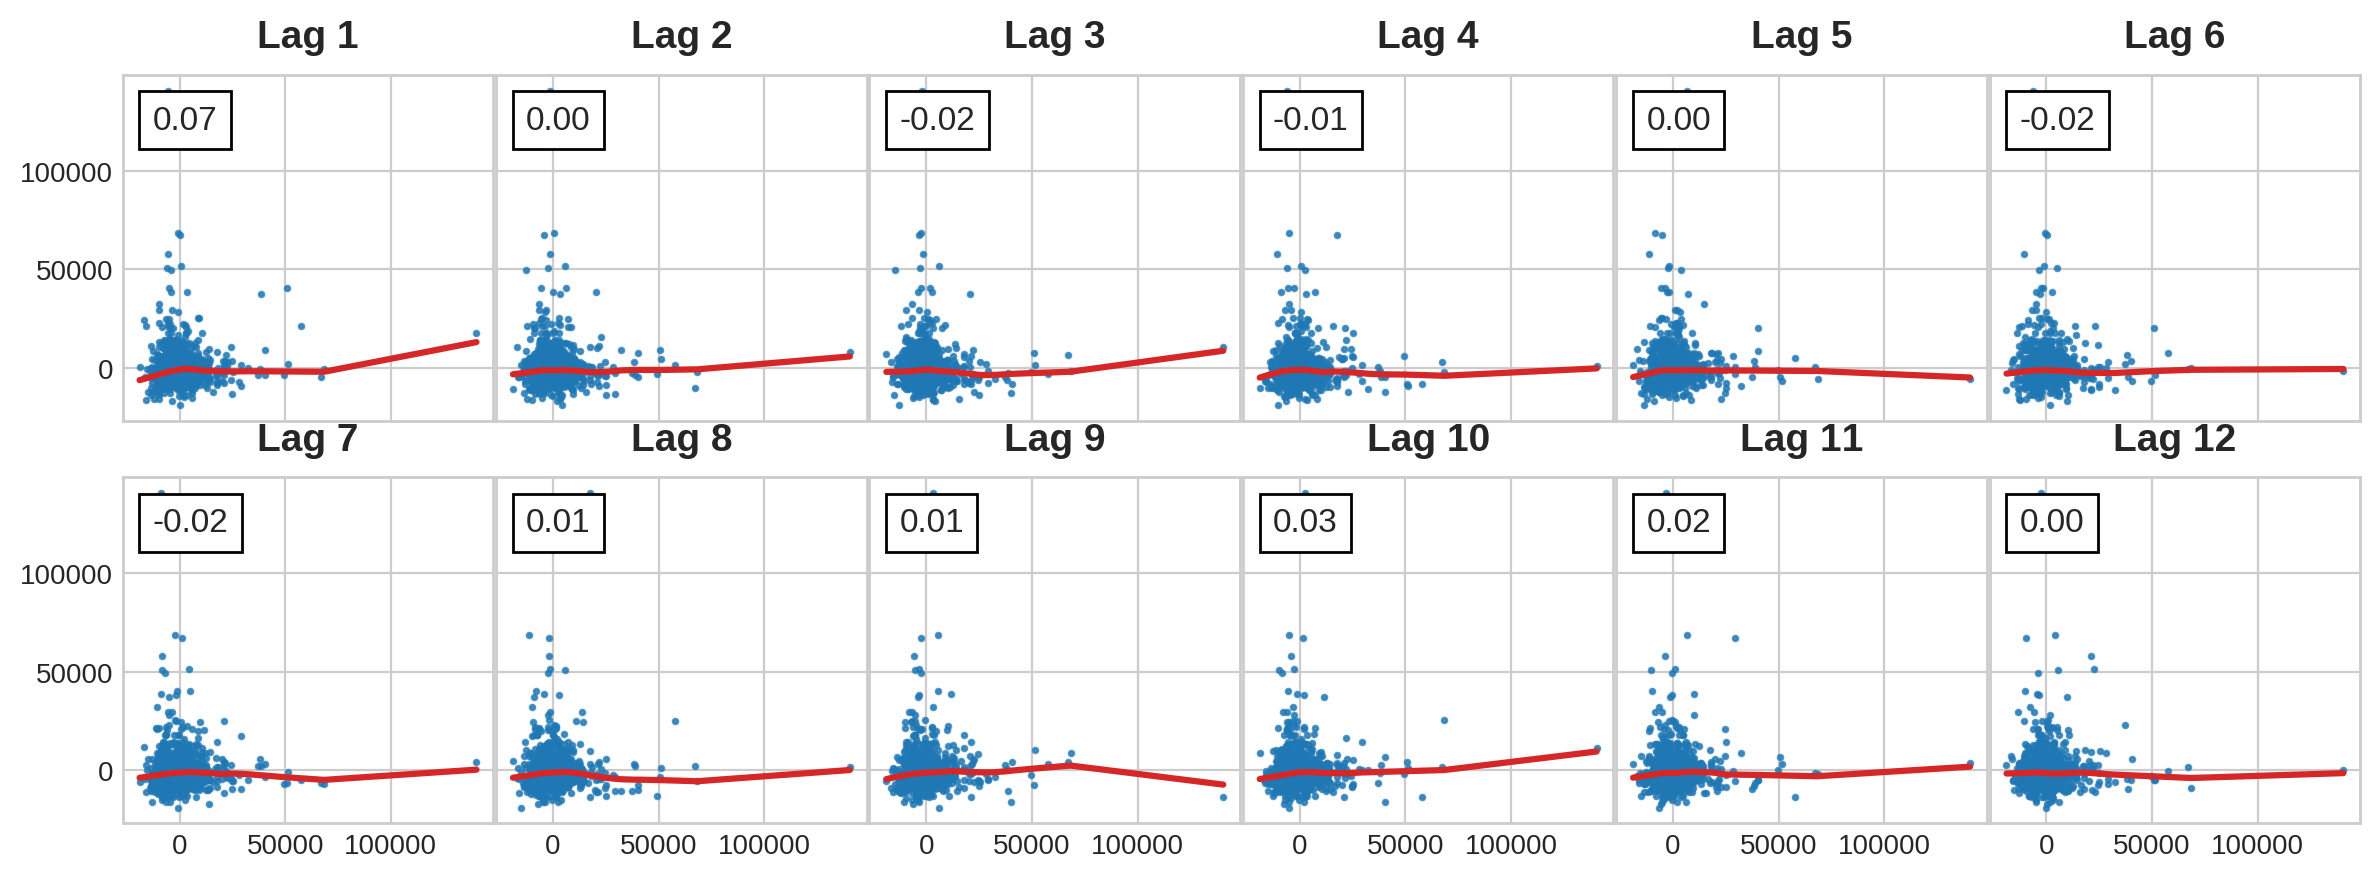

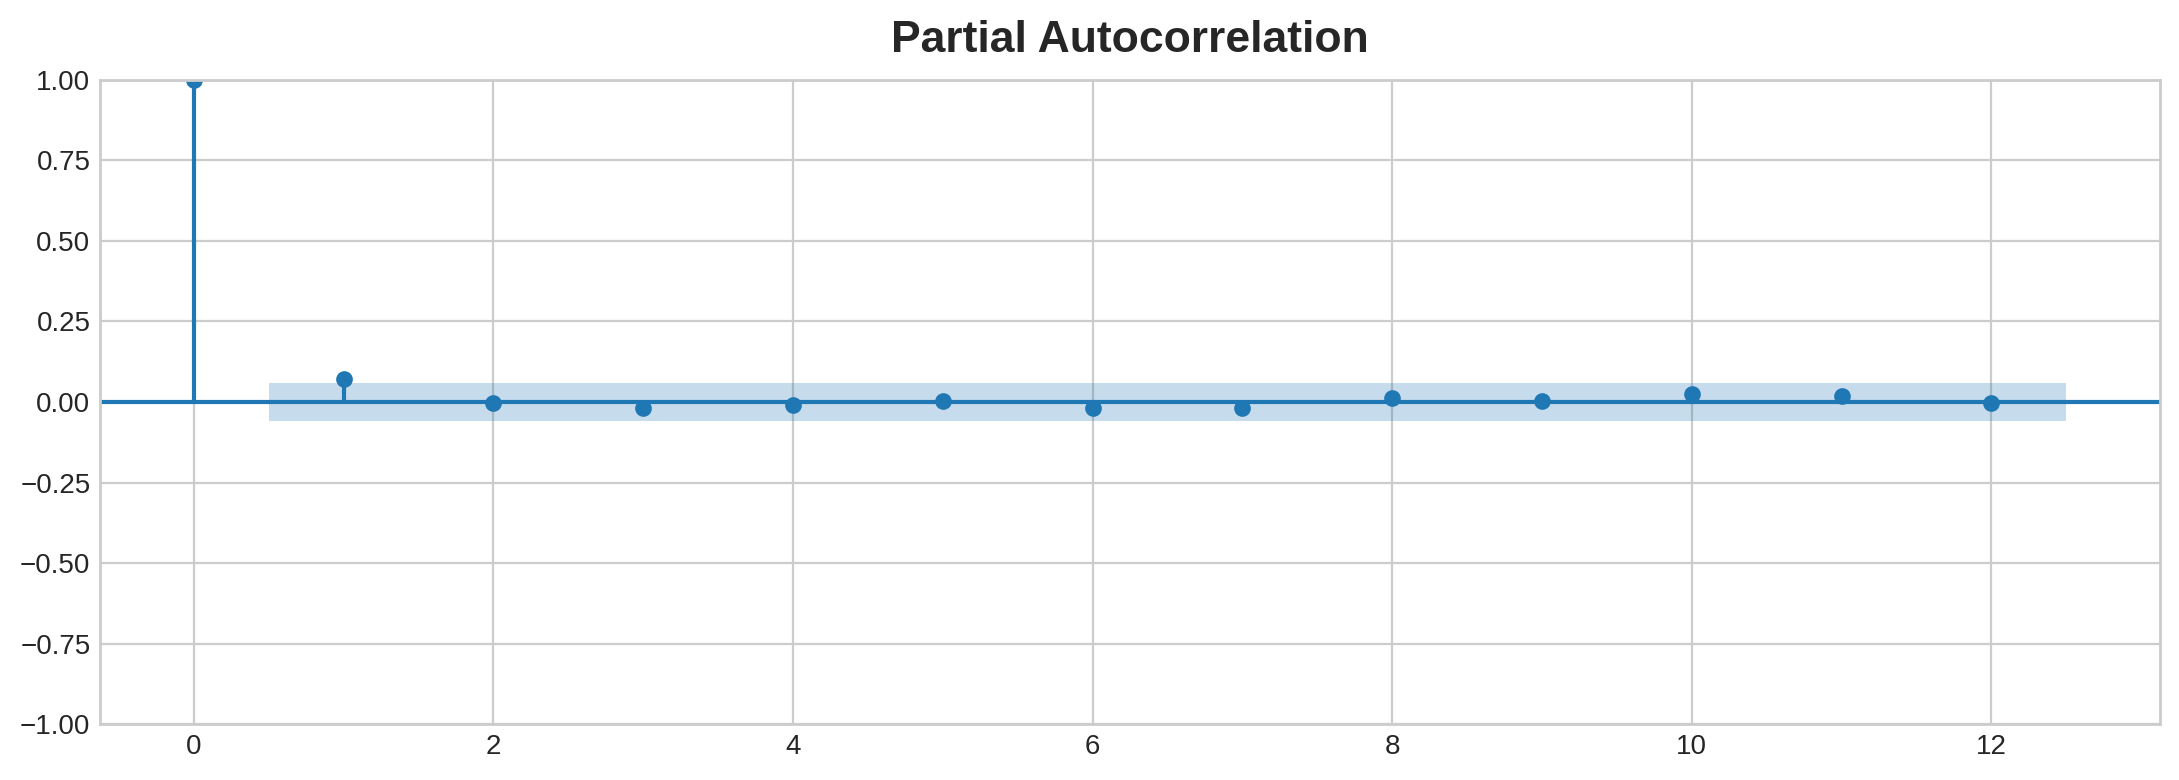

In [ ]:
plot_lags(y_rent_deseason, lags = 12, nrows = 2)
plot_pacf(y_rent_deseason, lags = 12)

**D. Lag Relationship**

These are the partial plots between the average price of a day and the next 12 days. Although there is a slightly significant correlation for lagging a day, it could be explained by the forward fill method for empty values. There is a 0.43 partial autocorrelation for lagging a day in transfer prices. However, it is found that 30% of the data is missing for transfer prices. So we can conclude that the main reason for correlation on the next date is due to the method we handle the data. Hence, the time series Method fails to explain the raise and fall of housing prices.

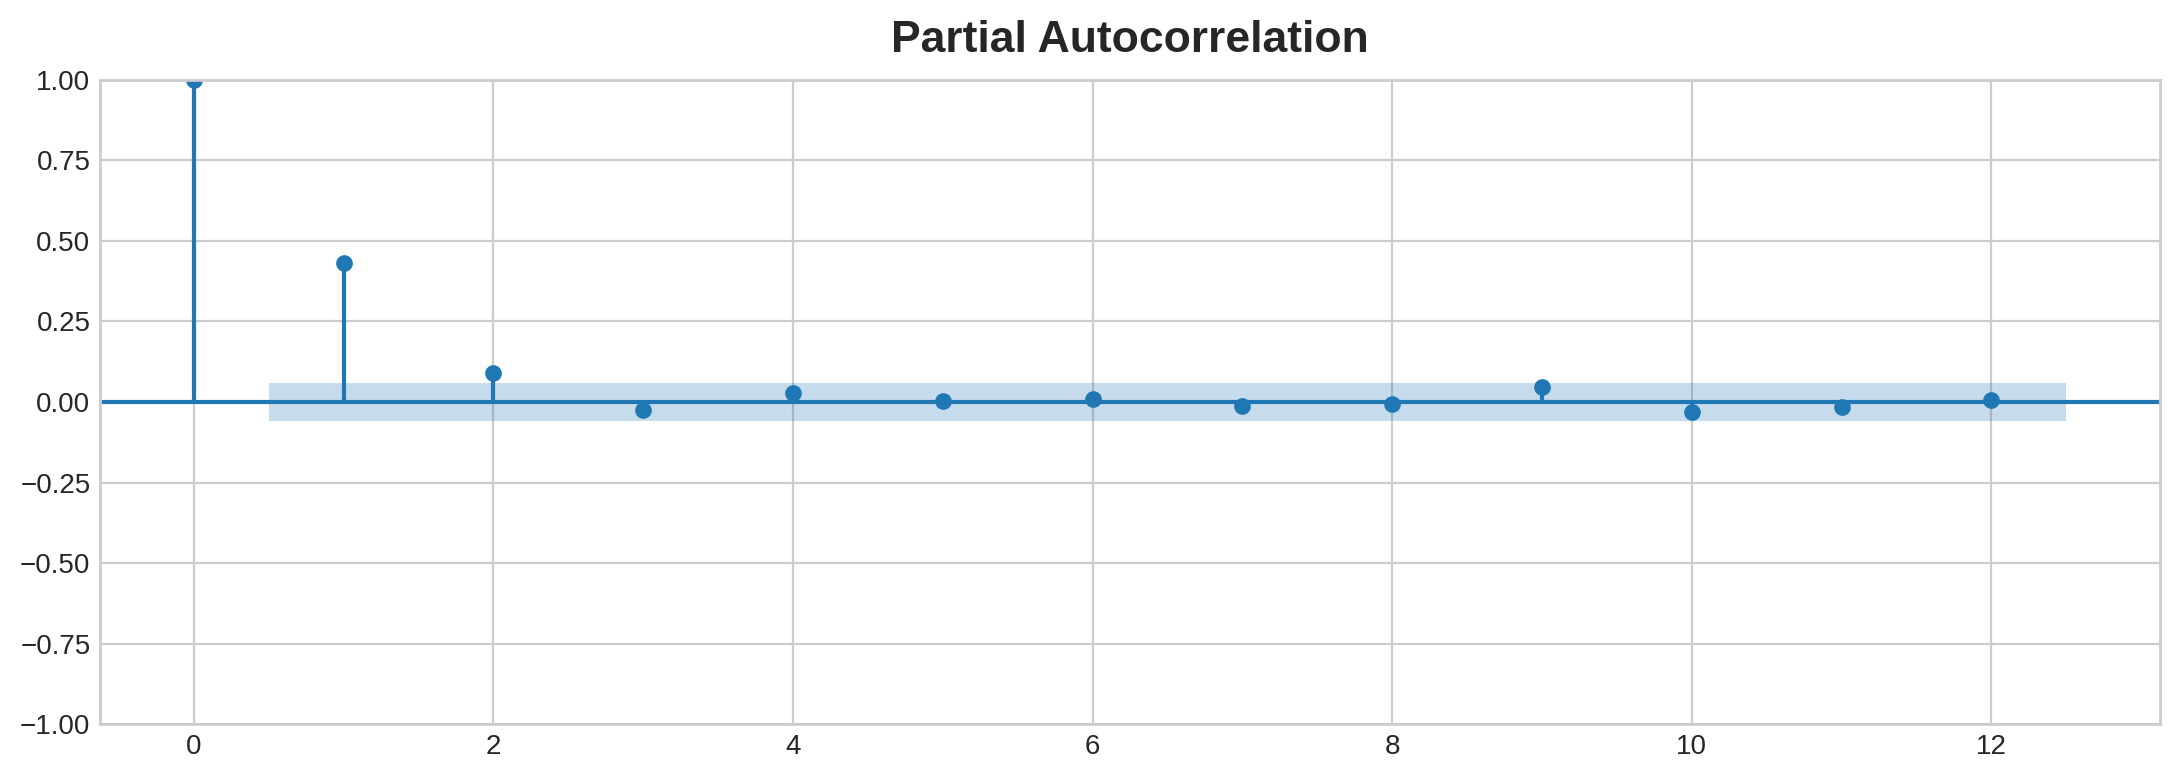

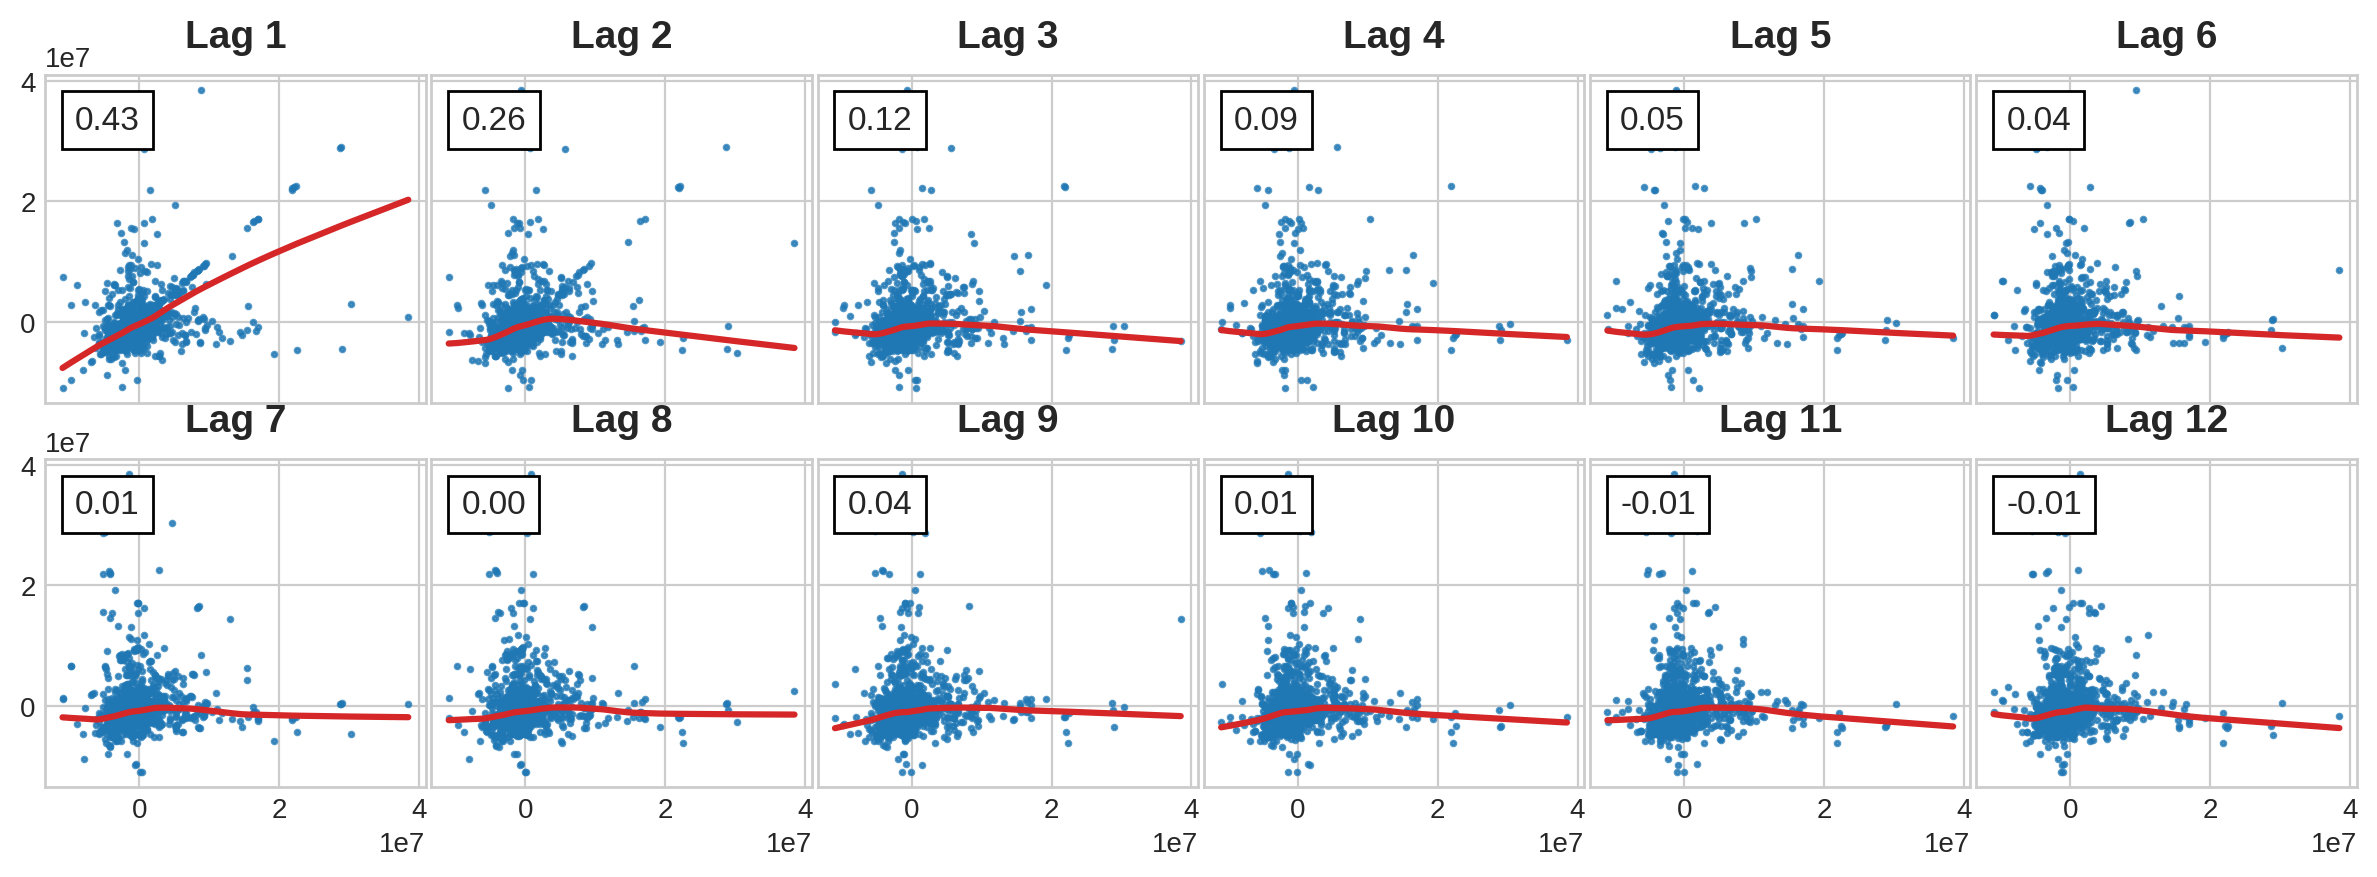

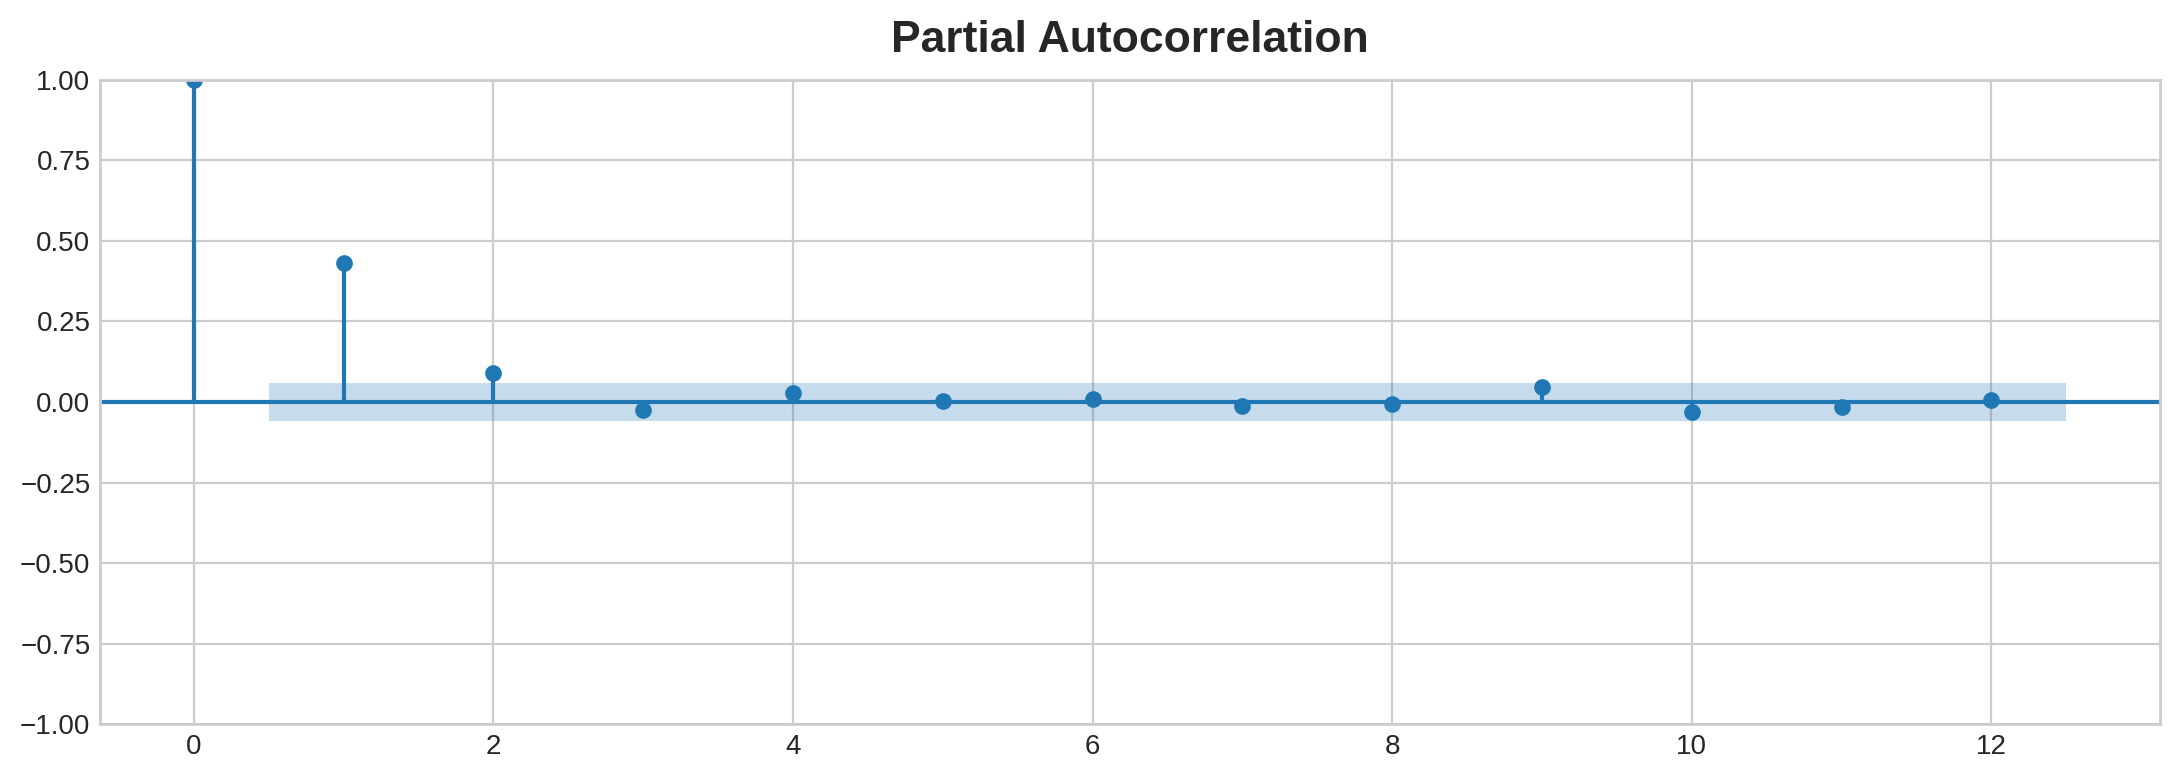

In [ ]:
plot_lags(y_sell_deseason, lags = 12, nrows = 2)
plot_pacf(y_sell_deseason, lags = 12)

In [ ]:
print(rent_na/1097)
print(sell_na/1097)

0.027347310847766638
0.3053783044667274


# 5. Regression Analysis
**A. Scatterplot**

These two graphs show the scatterplot between price, saleable area, district, and floor for rental and transfer houses. We can see a strong positive relationship between saleable area and price and a small correlation between district and price. Unexpectedly, a negative correlation exists between floor and price. This could be some bias in data, as we can see that the higher floor houses usually have a Small saleable area. Then, those houses will have a lower price, since large houses are usually lower in altitude.

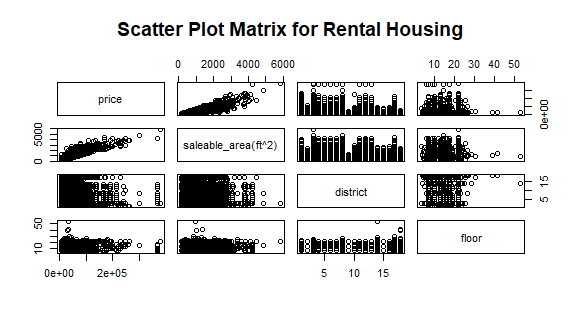

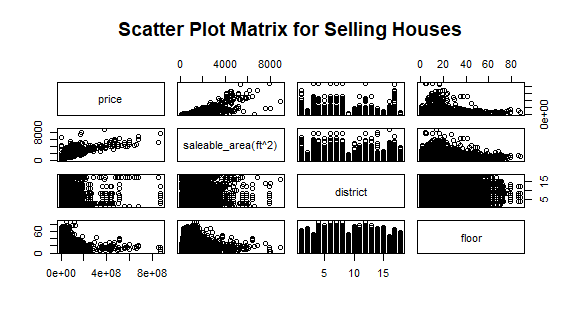

**B. Power Transformation**

By running the R code, we can do a box-cox transformation. It is found that the maximum likelihood of rental price power is 0.2626. After trying multiple transformations, including logarithmic transformation of price, power 0.25, 0.5, and 1 of price, we chose power 0.5 as it has the highest R-squared. For transfer price, we chose logarithmic transformation of price because the maximum likelihood of power is 0.1010.

**C. Multicollinearity**

By finding the Variance Inflation Factor (VIF), we can see the multicollinearity of the explanatory variables. Fortunately, all the variables have VIF less than 1.1, and hence there is no multicollinearity problem.

**D. Variable Selection**

By doing a forward stepwise selection with the Akaike Information Criterion (AIC), the full model, with the saleable area, district, and floor, is the best model.

The coefficients of rental price model is provided below.

Call:
lm(formula = price^0.5 ~ `saleable_area(ft^2)` + district + floor,
    data = rent_new)

Coefficients:
                                  (Intercept)  
                                      96.8289  
                        `saleable_area(ft^2)`  
                                       0.1062  
            districtHKIsIand Eastern District  
                                     -12.7248  
           districtHKIsIand Southern District  
                                     -10.0742  
        districtKowloon Kowloon City District  
                                     -11.1943  
           districtKowloon Kwun Tong District  
                                     -14.4821  
        districtKowloon Sham Shui Po District  
                                     -12.1726  
        districtKowloon Wong Tai Sin District  
                                     -12.7120  
       districtKowloon Yau Tsim Mong District  
                                      -7.3450  
                  districtKwai Tsing District  
                                     -25.6046  
districtNew Territories East Long Ping Estate  
                                     -24.8977  
  districtNew Territories East North District  
                                     -16.9955  
districtNew Territories East Sha Tin District  
                                     -15.8338  
 districtNew Territories East Tai Po District  
                                     -18.3288  
districtNew Territories West Islands District  
                                     -37.2233  
                   districtTsuen Wan District  
                                     -26.4111  
                    districtTuen Mun District  
                                     -36.6181  
                    districtWan Chai District  
                                      -0.2306  
                   districtYuen Long District  
                                     -37.3534  
                                        floor  
                                       0.1979  

Meanwhile, here are the coefficients of transfer price model.

Call:
lm(formula = log(price) ~ `saleable_area(ft^2)` + district +
    floor, data = sell_new)

Coefficients:
                                  (Intercept)  
                                     15.12900  
                        `saleable_area(ft^2)`  
                                      0.00133  
            districtHKIsIand Eastern District  
                                     -0.12652  
           districtHKIsIand Southern District  
                                      0.08845  
        districtKowloon Kowloon City District  
                                     -0.11437  
           districtKowloon Kwun Tong District  
                                     -0.25032  
        districtKowloon Sham Shui Po District  
                                     -0.17640  
        districtKowloon Wong Tai Sin District  
                                     -0.20916  
       districtKowloon Yau Tsim Mong District  
                                     -0.08659  
                  districtKwai Tsing District  
                                     -0.31298  
districtNew Territories East Long Ping Estate  
                                     -0.20353  
  districtNew Territories East North District  
                                     -0.27458  
districtNew Territories East Sha Tin District  
                                     -0.24341  
 districtNew Territories East Tai Po District  
                                     -0.28624  
districtNew Territories West Islands District  
                                     -0.42115  
                   districtTsuen Wan District  
                                     -0.30482  
                    districtTuen Mun District  
                                     -0.37771  
                    districtWan Chai District  
                                      0.06290  
                   districtYuen Long District  
                                     -0.21217  
                                        floor  
                                      0.01008  



# 6. Conclusion
It is difficult to use time series to capture the periodic change of transaction price. But we can use the characteristics of transacted houses to do a regression, to model the fair market value of each houses.